In [ ]:
pip install pyarrow

In [ ]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
csv_file = '/content/drive/MyDrive/CEVA Invoicing Data V3.xlsx - INVAUDIT.csv'
ceva = pd.read_csv(csv_file)
ceva.head(5)




<ipython-input-2-d8a98ec37e64>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ceva = pd.read_csv(csv_file)


,Invoice Issue Date,Invoice Number,Debtor Number,Booking number,Note Type,Currency,Net Amount,VAT Amount,Total Amount,GST on Imported Goods,Payment Terms,Note Class,Invoice Due Date,Invoice Paid Date
0,20200403,11387863,1000480413,NaN,5,CAD,1786.89,103.78,2050.91,0.0,30,4,20200503,05/05/2020
1,20200401,11388866,1868550,CA266-00000941,1,CAD,437.14,0.00,437.14,0.0,0,1,20200401,10/04/2020
2,20200401,11388867,1868550,CA266-00000942,1,CAD,307.07,0.00,307.07,0.0,0,1,20200401,01/04/2020
3,20200401,11388868,1000120827,OD104-0021335,1,USD,2948.00,0.00,2948.00,0.0,30,17,20200501,03/05/2020
4,20200401,11388869,1000120827,OD104-0021187,1,USD,985.00,0.00,985.00,0.0,30,17,20200501,02/05/2020


In [ ]:
column_types=ceva.dtypes
print(column_types)

Invoice Issue Date         int64
Invoice Number            object
Debtor Number              int64
Booking number            object
Note Type                  int64
Currency                  object
Net Amount               float64
VAT Amount               float64
Total Amount             float64
GST on Imported Goods    float64
Payment Terms              int64
Note Class                 int64
Invoice Due Date           int64
Invoice Paid Date         object
dtype: object


In [ ]:

#ceva.date = pd.to_datetime(ceva.date.astype(str), format='%Y%m%d')
#ceva['Invoice Issue Date'] = pd.to_datetime(ceva['Invoice Issue Date'], format='%Y%m%d')

ceva['Invoice Issue Date'] = ceva['Invoice Issue Date'].astype(str)
ceva['Invoice Issue Date'] = pd.to_datetime(ceva['Invoice Issue Date'], format='%Y%m%d', errors='coerce')

ceva['Invoice Due Date'] = ceva['Invoice Due Date'].astype(str)
ceva['Invoice Due Date'] = pd.to_datetime(ceva['Invoice Due Date'], format='%Y%m%d', errors='coerce')
#ceva['Invoice Due Date'] = pd.to_datetime(ceva['Invoice Due Date'])

ceva['Invoice Paid Date']=ceva['Invoice Paid Date'].astype(str)
ceva['Invoice Paid Date'] = pd.to_datetime(ceva['Invoice Paid Date'], format='%d/%m/%Y', errors='coerce')
print(ceva)


       Invoice Issue Date Invoice Number  Debtor Number  Booking number  \
0              2020-04-03       11387863     1000480413             NaN   
1              2020-04-01       11388866        1868550  CA266-00000941   
2              2020-04-01       11388867        1868550  CA266-00000942   
3              2020-04-01       11388868     1000120827   OD104-0021335   
4              2020-04-01       11388869     1000120827   OD104-0021187   
...                   ...            ...            ...             ...   
103754         2023-03-31       12084145     1000120827   OD104-0044536   
103755         2023-03-31       12084146     1000120827   OD104-0044541   
103756         2023-03-31       12084147     1000120827   OD104-0044806   
103757         2023-03-31       12084150     1000377408   OD104-0041153   
103758         2023-03-31       12084151     1000655888   OH104-0010510   

        Note Type Currency  Net Amount  VAT Amount  Total Amount  \
0               5      CAD     

In [ ]:
ceva.dtypes

Invoice Issue Date       datetime64[ns]
Invoice Number                   object
Debtor Number                     int64
Booking number                   object
Note Type                         int64
Currency                         object
Net Amount                      float64
VAT Amount                      float64
Total Amount                    float64
GST on Imported Goods           float64
Payment Terms                     int64
Note Class                        int64
Invoice Due Date         datetime64[ns]
Invoice Paid Date        datetime64[ns]
dtype: object

In [ ]:
def clean_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return None

ceva['Invoice Number'] = ceva['Invoice Number'].apply(clean_int)

# Filter out rows with non-integer values
ceva = ceva[ceva['Invoice Number'].notna()]

# Convert the cleaned column to int64 data type
ceva['Invoice Number'] = ceva['Invoice Number'].astype('int64')

<ipython-input-5-5019b1c6eb81>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceva['Invoice Number'] = ceva['Invoice Number'].astype('int64')


In [ ]:
usd_to_cad_rate = 1.25  # Replace with your desired exchange rate

# Convert US amounts to CAD using the exchange rate
ceva.loc[ceva['Currency'] == 'USD', 'Total Amount'] = ceva[ceva['Currency'] == 'USD']['Total Amount'] * usd_to_cad_rate
ceva.loc[ceva['Currency'] == 'USD', 'VAT Amount'] = ceva[ceva['Currency'] == 'USD']['VAT Amount'] * usd_to_cad_rate
ceva.loc[ceva['Currency'] == 'USD', 'GST on Imported Goods'] = ceva[ceva['Currency'] == 'USD']['GST on Imported Goods'] * usd_to_cad_rate

# Print the updated DataFrame
print(ceva)

       Invoice Issue Date  Invoice Number  Debtor Number  Booking number  \
0              2020-04-03        11387863     1000480413             NaN   
1              2020-04-01        11388866        1868550  CA266-00000941   
2              2020-04-01        11388867        1868550  CA266-00000942   
3              2020-04-01        11388868     1000120827   OD104-0021335   
4              2020-04-01        11388869     1000120827   OD104-0021187   
...                   ...             ...            ...             ...   
103754         2023-03-31        12084145     1000120827   OD104-0044536   
103755         2023-03-31        12084146     1000120827   OD104-0044541   
103756         2023-03-31        12084147     1000120827   OD104-0044806   
103757         2023-03-31        12084150     1000377408   OD104-0041153   
103758         2023-03-31        12084151     1000655888   OH104-0010510   

        Note Type Currency  Net Amount  VAT Amount  Total Amount  \
0               5  

In [ ]:
columns_to_drop = ['Note Type', 'Booking number', 'Note Class']
ceva = ceva.drop(columns=columns_to_drop, axis=1)



In [ ]:
print(ceva)

      Invoice Issue Date  Invoice Number  Debtor Number Currency  Net Amount  \
413           2020-04-07        11391490         413046      CAD     2434.75   
519           2020-04-09        11392460         413046      CAD     1568.90   
3741          2020-05-21        11414560         413046      CAD     2281.92   
3949          2020-05-25        11416551         413046      USD       90.00   
5273          2020-06-08        11426818         413046      USD      275.00   
...                  ...             ...            ...      ...         ...   
88899         2022-11-15        11999242     2000000467      USD     1343.92   
56763         2022-01-31        11818857     2000000482      USD    18662.30   
62061         2022-03-17        11860795     2000000482      USD     6033.38   
63929         2022-04-04        11872963     2000000482      USD     6033.38   
63931         2022-04-04        11872966     2000000482      USD     8070.70   

       VAT Amount  Total Amount  GST on

In [ ]:
ceva['Invoice Issue Date'] = pd.to_datetime(ceva['Invoice Issue Date'])
ceva['group'] = ceva.groupby('Debtor Number').ngroup()

# Sort the DataFrame based on the grouping column and date
ceva = ceva.sort_values(by=['group', 'Invoice Issue Date'])

# Drop the temporary grouping column
ceva = ceva.drop('group', axis=1)
print(ceva)

      Invoice Issue Date  Invoice Number  Debtor Number Currency  Net Amount  \
413           2020-04-07        11391490         413046      CAD     2434.75   
519           2020-04-09        11392460         413046      CAD     1568.90   
3741          2020-05-21        11414560         413046      CAD     2281.92   
3949          2020-05-25        11416551         413046      USD       90.00   
5273          2020-06-08        11426818         413046      USD      275.00   
...                  ...             ...            ...      ...         ...   
88899         2022-11-15        11999242     2000000467      USD     1343.92   
56763         2022-01-31        11818857     2000000482      USD    18662.30   
62061         2022-03-17        11860795     2000000482      USD     6033.38   
63929         2022-04-04        11872963     2000000482      USD     6033.38   
63931         2022-04-04        11872966     2000000482      USD     8070.70   

       VAT Amount  Total Amount  GST on

In [ ]:
filtered_df = ceva[ceva['Debtor Number'] == 413046]

# Print the filtered DataFrame
print(filtered_df)

       Invoice Issue Date  Invoice Number  Debtor Number Currency  Net Amount  \
413            2020-04-07        11391490         413046      CAD     2434.75   
519            2020-04-09        11392460         413046      CAD     1568.90   
3741           2020-05-21        11414560         413046      CAD     2281.92   
3949           2020-05-25        11416551         413046      USD       90.00   
5273           2020-06-08        11426818         413046      USD      275.00   
...                   ...             ...            ...      ...         ...   
97659          2023-02-03        12046334         413046      USD     2068.69   
100342         2023-02-27        12063978         413046      CAD     4970.54   
102553         2023-03-22        12077922         413046      USD      221.33   
102740         2023-03-24        12079174         413046      USD     1931.07   
103513         2023-03-30        12083137         413046      CAD     1168.83   

        VAT Amount  Total A

In [ ]:
unique_debtor_count = ceva['Debtor Number'].nunique()

# Print the number of unique debtor numbers
print("Number of unique debtor numbers:", unique_debtor_count)

Number of unique debtor numbers: 1190


In [ ]:
grouped = ceva.groupby('Debtor Number').size().reset_index(name='record_count')

# Print the grouped DataFrame with record counts
print(grouped)

      Debtor Number  record_count
0            413046            94
1            419280           583
2            420822             3
3            421072          1169
4            421424            14
...             ...           ...
1185     2000000439             2
1186     2000000455             2
1187     2000000458           144
1188     2000000467             7
1189     2000000482             4

[1190 rows x 2 columns]


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'ceva' with columns including 'Debtor Number'

# Group by 'Debtor Number' and calculate the number of records for each debtor
debtor_record_counts = ceva.groupby('Debtor Number').size()

# Find the debtor number with the maximum number of records
max_records_debtor = debtor_record_counts.idxmax()
max_records_count = debtor_record_counts.max()

# Find the debtor number with the minimum number of records
min_records_debtor = debtor_record_counts.idxmin()
min_records_count = debtor_record_counts.min()

print("Debtor with the Maximum Number of Records:")
print("Debtor Number:", max_records_debtor)
print("Number of Records:", max_records_count)

print("\nDebtor with the Minimum Number of Records:")
print("Debtor Number:", min_records_debtor)
print("Number of Records:", min_records_count)


Debtor with the Maximum Number of Records:
Debtor Number: 1000103077
Number of Records: 18352

Debtor with the Minimum Number of Records:
Debtor Number: 532599
Number of Records: 1


<ipython-input-14-c619cdd40d6e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_debtor_data['Delayed Days'] = (random_debtor_data['Invoice Paid Date'] - random_debtor_data['Invoice Due Date']).dt.days


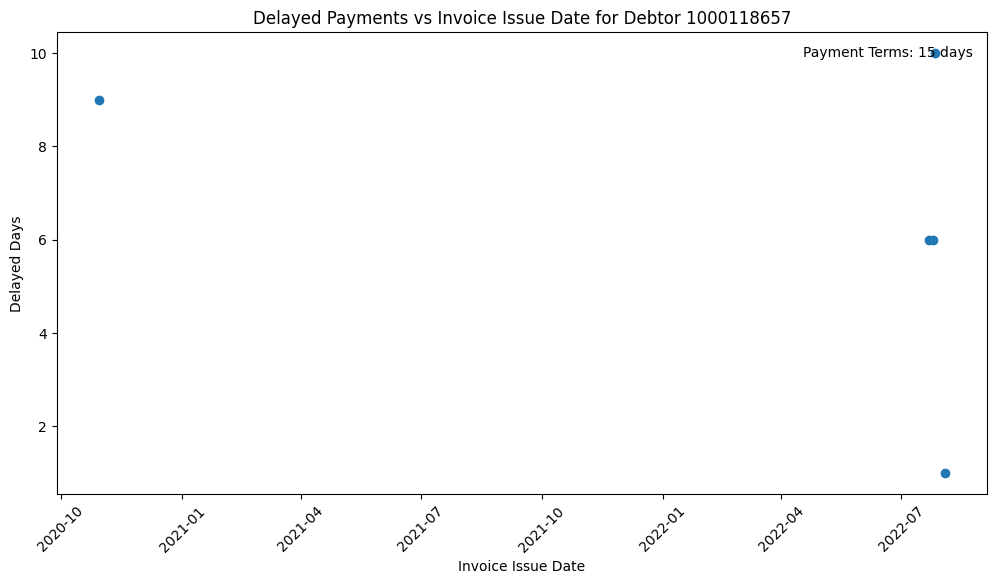

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Select a random debtor number
random_debtor = np.random.choice(ceva['Debtor Number'].unique())

# Filter the data for the random debtor
random_debtor_data = ceva[ceva['Debtor Number'] == random_debtor]

# Calculate delayed days
random_debtor_data['Delayed Days'] = (random_debtor_data['Invoice Paid Date'] - random_debtor_data['Invoice Due Date']).dt.days

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(random_debtor_data['Invoice Issue Date'], random_debtor_data['Delayed Days'])

# Annotate the payment terms at the top right
payment_terms = random_debtor_data['Payment Terms'].iloc[0]  # Assuming all rows have the same payment terms
plt.annotate(f"Payment Terms: {payment_terms} days",
             xy=(1, 1),
             xycoords='axes fraction',
             xytext=(-10, -10),
             textcoords='offset points',
             ha='right', va='top')

plt.xlabel('Invoice Issue Date')
plt.ylabel('Delayed Days')
plt.title(f'Delayed Payments vs Invoice Issue Date for Debtor {random_debtor}')
plt.xticks(rotation=45)
plt.show()



<ipython-input-17-d3bda872d9e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days


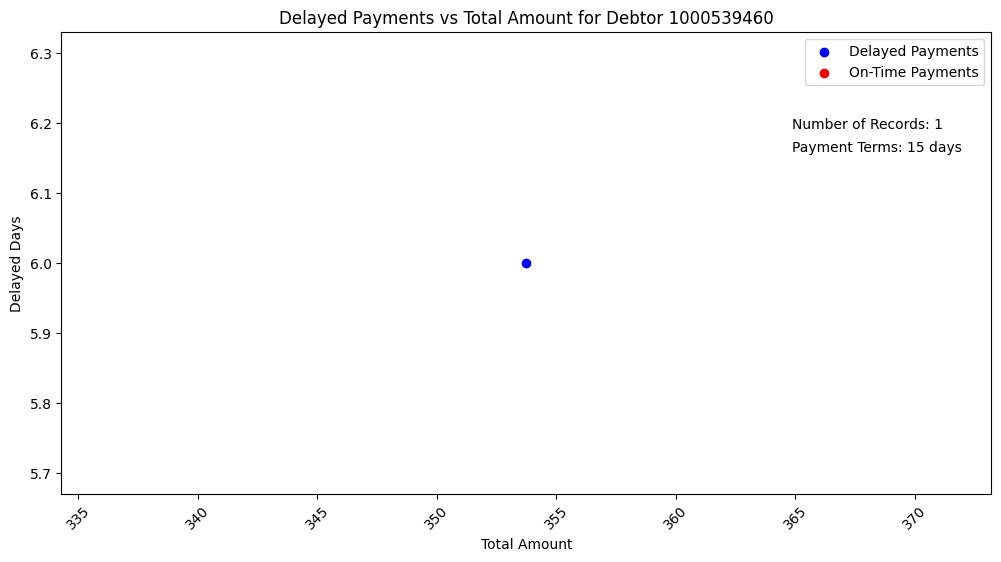

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Select a random debtor number
#debtor = int(input("Enter debtor number:"))
debtor = np.random.choice(ceva['Debtor Number'].unique())
# Filter the data for the random debtor
debtor_data = ceva[ceva['Debtor Number'] == debtor]

# Calculate delayed days
debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot delayed payments in blue
plt.scatter(debtor_data[debtor_data['Delayed Days'] > 0]['Total Amount'],
            debtor_data[debtor_data['Delayed Days'] > 0]['Delayed Days'],
            color='blue', label='Delayed Payments')

# Plot on-time payments in red
plt.scatter(debtor_data[debtor_data['Delayed Days'] <= 0]['Total Amount'],
            debtor_data[debtor_data['Delayed Days'] <= 0]['Delayed Days'],
            color='red', label='On-Time Payments')

# Annotate the payment terms in the middle right
payment_terms = debtor_data['Payment Terms'].iloc[0]  # Assuming all rows have the same payment terms
plt.annotate(f"Payment Terms: {payment_terms} days",
             xy=(0.8, 0.75),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

# Annotate the number of records in the middle right
num_records = len(debtor_data)
plt.annotate(f"Number of Records: {num_records}",
             xy=(0.8, 0.8),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

plt.xlabel('Total Amount')
plt.ylabel('Delayed Days')
plt.title(f'Delayed Payments vs Total Amount for Debtor {debtor}')
plt.legend()
plt.xticks(rotation=45)
plt.show()


<ipython-input-18-e5b516ed3cb3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days


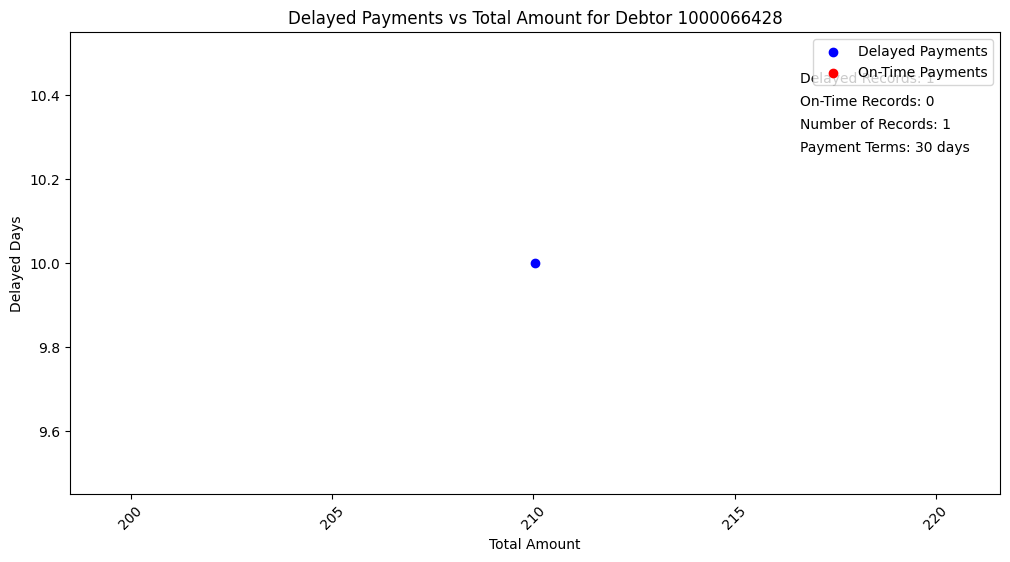

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Select a random debtor number
debtor = np.random.choice(ceva['Debtor Number'].unique())
# Filter the data for the random debtor
debtor_data = ceva[ceva['Debtor Number'] == debtor]

# Calculate delayed days
debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot delayed payments in blue
plt.scatter(debtor_data[debtor_data['Delayed Days'] > 0]['Total Amount'],
            debtor_data[debtor_data['Delayed Days'] > 0]['Delayed Days'],
            color='blue', label='Delayed Payments')

# Plot on-time payments in red
plt.scatter(debtor_data[debtor_data['Delayed Days'] <= 0]['Total Amount'],
            debtor_data[debtor_data['Delayed Days'] <= 0]['Delayed Days'],
            color='red', label='On-Time Payments')

# Annotate the payment terms in the middle right
payment_terms = debtor_data['Payment Terms'].iloc[0]  # Assuming all rows have the same payment terms
plt.annotate(f"Payment Terms: {payment_terms} days",
             xy=(0.8, 0.75),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

# Annotate the number of records in the middle right
num_records = len(debtor_data)
plt.annotate(f"Number of Records: {num_records}",
             xy=(0.8, 0.8),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

# Count the number of on-time and delayed records
num_on_time = len(debtor_data[debtor_data['Delayed Days'] <= 0])
num_delayed = len(debtor_data[debtor_data['Delayed Days'] > 0])

# Annotate the number of on-time records below the number of records
plt.annotate(f"On-Time Records: {num_on_time}",
             xy=(0.8, 0.85),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

# Annotate the number of delayed records below the number of on-time records
plt.annotate(f"Delayed Records: {num_delayed}",
             xy=(0.8, 0.9),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

plt.xlabel('Total Amount')
plt.ylabel('Delayed Days')
plt.title(f'Delayed Payments vs Total Amount for Debtor {debtor}')
plt.legend()
plt.xticks(rotation=45)
plt.show()


<ipython-input-19-f74b2e8cfda1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days


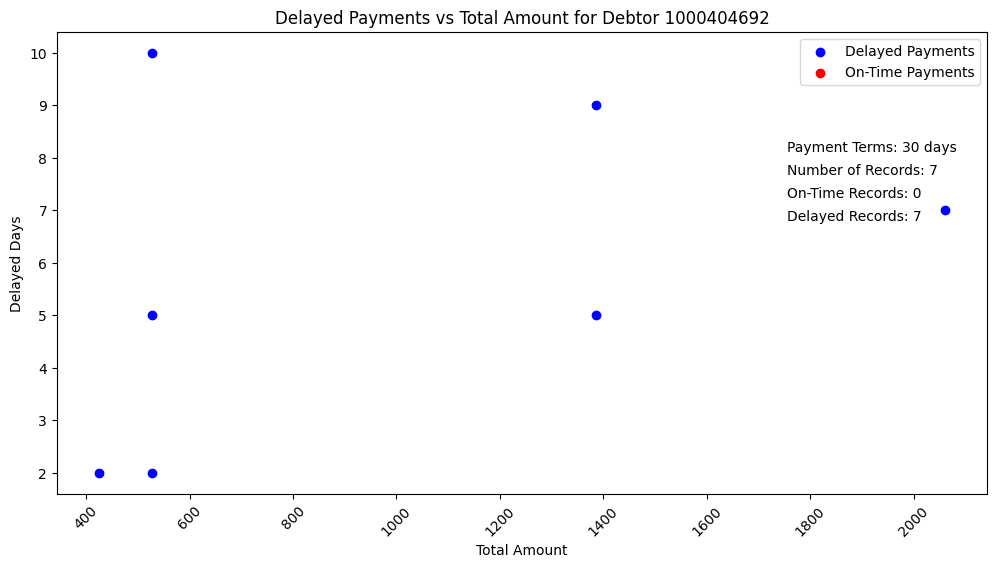

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Select a random debtor number
debtor = np.random.choice(ceva['Debtor Number'].unique())
# Filter the data for the random debtor
debtor_data = ceva[ceva['Debtor Number'] == debtor]

# Calculate delayed days
debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot delayed payments in blue
plt.scatter(debtor_data[debtor_data['Delayed Days'] > 0]['Total Amount'],
            debtor_data[debtor_data['Delayed Days'] > 0]['Delayed Days'],
            color='blue', label='Delayed Payments')

# Plot on-time payments in red
plt.scatter(debtor_data[debtor_data['Delayed Days'] <= 0]['Total Amount'],
            debtor_data[debtor_data['Delayed Days'] <= 0]['Delayed Days'],
            color='red', label='On-Time Payments')

# Annotate the payment terms in the middle right
payment_terms = debtor_data['Payment Terms'].iloc[0]  # Assuming all rows have the same payment terms
plt.annotate(f"Payment Terms: {payment_terms} days",
             xy=(0.8, 0.75),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

# Annotate the number of records below the payment terms
num_records = len(debtor_data)
plt.annotate(f"Number of Records: {num_records}",
             xy=(0.8, 0.7),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

# Count the number of on-time and delayed records
num_on_time = len(debtor_data[debtor_data['Delayed Days'] <= 0])
num_delayed = len(debtor_data[debtor_data['Delayed Days'] > 0])

# Annotate the number of on-time records below the number of records
plt.annotate(f"On-Time Records: {num_on_time}",
             xy=(0.8, 0.65),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

# Annotate the number of delayed records below the number of on-time records
plt.annotate(f"Delayed Records: {num_delayed}",
             xy=(0.8, 0.6),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='left', va='center', fontsize=10)

plt.xlabel('Total Amount')
plt.ylabel('Delayed Days')
plt.title(f'Delayed Payments vs Total Amount for Debtor {debtor}')
plt.legend()
plt.xticks(rotation=45)
plt.show()



<ipython-input-20-0b7e431bda34>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days


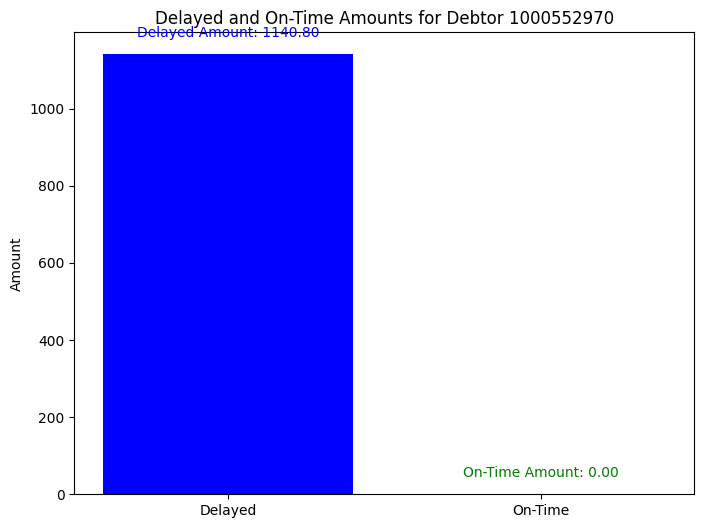

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Select a random debtor number

#debtor=int(input("Enter the debtor number:"))
debtor = np.random.choice(ceva['Debtor Number'].unique())
# Filter the data for the random debtor
debtor_data = ceva[ceva['Debtor Number'] == debtor]

# Calculate delayed days
debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days

# Calculate the loss for each payment (delayed days * total amount)


# Calculate the total loss
total_delayed = debtor_data[debtor_data['Delayed Days'] > 0]['Total Amount'].sum()

# Calculate the total amount for payments that were on time
total_ontime_amount = debtor_data[debtor_data['Delayed Days'] <= 0]['Total Amount'].sum()

# Plot the losses and on-time amounts
plt.figure(figsize=(8, 6))
plt.bar(['Delayed', 'On-Time'], [total_delayed, total_ontime_amount], color=['blue', 'green'])
plt.ylabel('Amount')
plt.title(f'Delayed and On-Time Amounts for Debtor {debtor}')

# Annotate the total loss and on-time amount
plt.annotate(f'Delayed Amount: {total_delayed:.2f}',
             xy=(0, total_delayed),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center', va='bottom', color='blue')

plt.annotate(f'On-Time Amount: {total_ontime_amount:.2f}',
             xy=(1, total_ontime_amount),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center', va='bottom', color='green')

plt.show()


In [ ]:
debtor_data.dtypes

Invoice Issue Date       datetime64[ns]
Invoice Number                    int64
Debtor Number                     int64
Currency                         object
Net Amount                      float64
VAT Amount                      float64
Total Amount                    float64
GST on Imported Goods           float64
Payment Terms                     int64
Note Class                        int64
Invoice Due Date         datetime64[ns]
Invoice Paid Date        datetime64[ns]
Delayed Days                      int64
dtype: object

<ipython-input-22-bf126a71fe83>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days
<ipython-input-22-bf126a71fe83>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debtor_data['Weighted Delayed'] = a * debtor_data[debtor_data['Delayed Days']>0]['Total Amount'] + b * debtor_data[debtor_data['Delayed Days']>0]['Delayed Days']


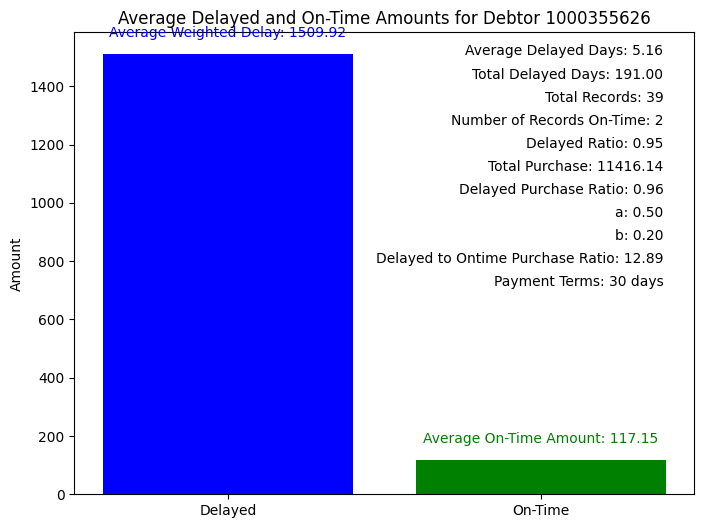

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Select a random debtor number
#debtor = int(input("Enter debtor number:"))
debtor = np.random.choice(ceva['Debtor Number'].unique())
# Filter the data for the random debtor
debtor_data = ceva[ceva['Debtor Number'] == debtor]

# Calculate delayed days
debtor_data['Delayed Days'] = (debtor_data['Invoice Paid Date'] - debtor_data['Invoice Due Date']).dt.days

# Parameters
a = 0.5  # Coefficient for amount
b = 0.2  # Coefficient for delayed days

# Calculating the loss for each payment (a * amount + b * delayed days)
debtor_data['Weighted Delayed'] = a * debtor_data[debtor_data['Delayed Days']>0]['Total Amount'] + b * debtor_data[debtor_data['Delayed Days']>0]['Delayed Days']

# Calculate the total loss
total_weighted_delay = debtor_data['Weighted Delayed'].sum()

# Calculate the total amount for payments that were on time
total_ontime_amount = debtor_data[debtor_data['Delayed Days'] <= 0]['Total Amount'].sum()

# Calculate the average delayed days and total delayed days
average_delayed_days = debtor_data[debtor_data['Delayed Days'] > 0]['Delayed Days'].mean()
total_delayed_days = debtor_data[debtor_data['Delayed Days'] > 0]['Delayed Days'].sum()

# Calculate the delayed ratio based on the total purchase that was delayed over the total purchase
delayed_purchase = debtor_data[debtor_data['Delayed Days'] > 0]['Total Amount'].sum()
total_purchase = debtor_data['Total Amount'].sum()
delayed_purchase_ratio = delayed_purchase / total_purchase
# Calculate total purchase


# Calculate delayed purchase
delayed_purchase = debtor_data[debtor_data['Delayed Days'] > 0]['Total Amount'].sum()

# Calculate delayed to total purchase ratio



# Get the total number of records
total_records = len(debtor_data)

# Get the number of records paid on time
num_records_ontime = len(debtor_data[debtor_data['Delayed Days'] <= 0])

delayed_records=total_records-num_records_ontime

delayed_ratio=delayed_records/total_records

delayed_to_ontime_purchase_ratio=total_weighted_delay/total_ontime_amount
payment_terms = debtor_data['Payment Terms'].iloc[0]  # Assuming all rows have the same payment terms

# Plot the losses and on-time amounts

log_num_records = np.log(total_records)
average_weighted_delay = total_weighted_delay / log_num_records
average_ontime_amount = total_ontime_amount / log_num_records



# Plot the losses and on-time amounts
plt.figure(figsize=(8, 6))
plt.bar(['Delayed', 'On-Time'], [average_weighted_delay, average_ontime_amount], color=['blue', 'green'])
plt.ylabel('Amount')
plt.title(f'Average Delayed and On-Time Amounts for Debtor {debtor}')

# Annotate the average loss and on-time amount per record
plt.annotate(f'Average Weighted Delay: {average_weighted_delay:.2f}',
             xy=(0, average_weighted_delay),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center', va='bottom', color='blue')

plt.annotate(f'Average On-Time Amount: {average_ontime_amount:.2f}',
             xy=(1, average_ontime_amount),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center', va='bottom', color='green')

# Display delayed ratio, average delayed days, total delayed days, total records, a, and b

plt.text(0.95, 0.95, f'Average Delayed Days: {average_delayed_days:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.9, f'Total Delayed Days: {total_delayed_days:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f'Total Records: {total_records}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.80, f'Number of Records On-Time: {num_records_ontime}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.75, f'Delayed Ratio: {delayed_ratio:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.7, f'Total Purchase: {total_purchase:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.65, f'Delayed Purchase Ratio: {delayed_purchase_ratio:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.6, f'a: {a:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.55, f'b: {b:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.5, f'Delayed to Ontime Purchase Ratio: {delayed_to_ontime_purchase_ratio:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.45, f'Payment Terms: {payment_terms} days', transform=plt.gca().transAxes, ha='right')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

ceva = ceva[ceva['Invoice Issue Date'].dt.year != 2023]
# Group data by Debtor Number and year, and count the number of records
grouped_data = ceva.groupby(['Debtor Number', ceva['Invoice Issue Date'].dt.year]).size().reset_index(name='Record Count')

# Pivot the table to have years as columns
pivot_table = grouped_data.pivot(index='Debtor Number', columns='Invoice Issue Date', values='Record Count')

# Fill NaN values with 0
pivot_table = pivot_table.fillna(0)
pivot_table['Average Records'] = pivot_table[[2020, 2021, 2022]].mean(axis=1)
# Rename columns for clarity
pivot_table = pivot_table.rename(columns={2020: 'Records 2020', 2021: 'Records 2021', 2022: 'Records 2022'})

# Print the resulting table
pivot_table

Invoice Issue Date,Records 2020,Records 2021,Records 2022,Average Records
Debtor Number,,,,
413046,15.0,36.0,30.0,27.000000
419280,15.0,46.0,423.0,161.333333
421072,376.0,596.0,177.0,383.000000
421424,4.0,8.0,2.0,4.666667
424282,358.0,216.0,192.0,255.333333
...,...,...,...,...
2000000438,0.0,2.0,0.0,0.666667
2000000455,1.0,0.0,0.0,0.333333
2000000458,0.0,41.0,56.0,32.333333


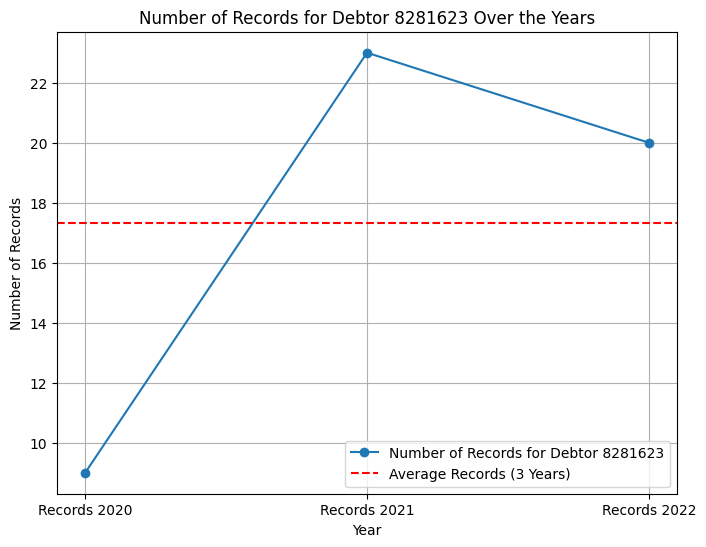

In [ ]:
import matplotlib.pyplot as plt

# Select a random Debtor Number from the existing pivot_table
available_debtors = pivot_table.index
if available_debtors.size == 0:
    print("No data available for plotting.")
else:
    random_debtor = np.random.choice(available_debtors)

    # Extract the years and record counts for the random Debtor Number
    years = pivot_table.columns[:-1]  # Exclude the 'Average Records' column
    if random_debtor in available_debtors:
        record_counts = pivot_table.loc[random_debtor][years].values
    else:
        record_counts = [0] * len(years)

    # Calculate the average records over three years
    average_records = pivot_table.loc[random_debtor]['Average Records']

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.plot(years, record_counts, marker='o', label=f'Number of Records for Debtor {random_debtor}')
    plt.axhline(y=average_records, color='r', linestyle='--', label='Average Records (3 Years)')

    plt.xlabel('Year')
    plt.ylabel('Number of Records')
    plt.title(f'Number of Records for Debtor {random_debtor} Over the Years')
    plt.xticks(years)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Filter out data for the year 2023
ceva = ceva[ceva['Invoice Issue Date'].dt.year != 2023]

# Group data by Debtor Number and year, and calculate the total purchase for each debtor
grouped_data_total_amount = ceva.groupby(['Debtor Number', ceva['Invoice Issue Date'].dt.year])['Total Amount'].sum().reset_index(name='Total Amount')

# Pivot the table to have years as columns
pivot_table_total_amount = grouped_data_total_amount.pivot(index='Debtor Number', columns='Invoice Issue Date', values='Total Amount')

# Fill NaN values with 0
pivot_table_total_amount = pivot_table_total_amount.fillna(0)
pivot_table_total_amount['Average Total Amount'] = pivot_table_total_amount[[2020, 2021, 2022]].mean(axis=1)

# Rename columns for clarity
pivot_table_total_amount = pivot_table_total_amount.rename(columns={2020: 'Total Amount 2020', 2021: 'Total Amount 2021', 2022: 'Total Amount 2022'})

# Print the resulting table
pivot_table_total_amount


Invoice Issue Date,Total Amount 2020,Total Amount 2021,Total Amount 2022,Average Total Amount
Debtor Number,,,,
413046,13982.0350,4.736654e+04,127285.8825,62878.150833
419280,5289.5375,2.609289e+04,941721.4500,324367.958333
421072,492362.6225,6.232953e+05,313156.8250,476271.580000
421424,10261.0625,2.393821e+04,1799.9125,11999.729167
424282,212579.9175,2.834338e+05,456247.9900,317420.585000
...,...,...,...,...
2000000438,0.0000,2.482300e+03,0.0000,827.433333
2000000455,-21459.3750,0.000000e+00,0.0000,-7153.125000
2000000458,0.0000,1.734746e+06,268287.2000,667677.837500


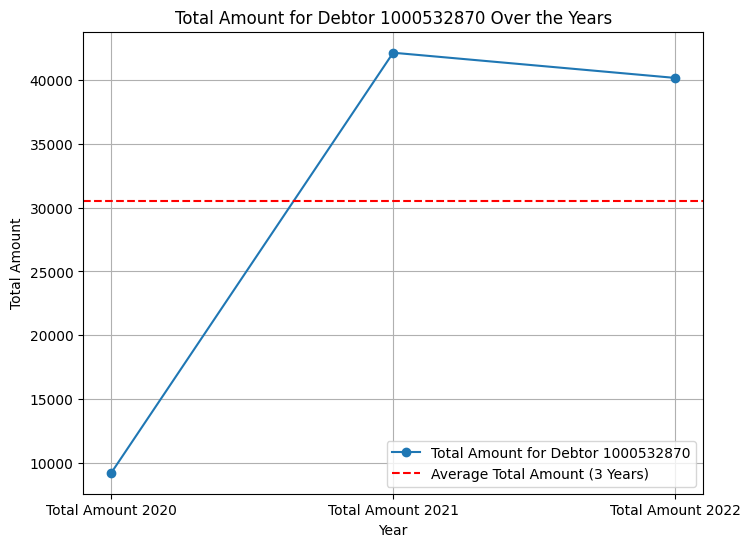

In [ ]:
import matplotlib.pyplot as plt

# Select a random Debtor Number from the existing pivot_table
available_debtors = pivot_table_total_amount.index
if available_debtors.size == 0:
    print("No data available for plotting.")
else:
    random_debtor = np.random.choice(available_debtors)

    # Extract the years and total amounts for the random Debtor Number
    years_total_amount = pivot_table_total_amount.columns[:-1]  # Exclude the 'Average Total Amount' column

    # Check if the random debtor is in the available debtors
    if random_debtor in available_debtors:
        total_amounts = pivot_table_total_amount.loc[random_debtor][years_total_amount].values
    else:
        total_amounts = [0] * len(years_total_amount)

    # Calculate the average total amount over three years
    average_total_amount = pivot_table_total_amount.loc[random_debtor]['Average Total Amount']

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.plot(years_total_amount, total_amounts, marker='o', label=f'Total Amount for Debtor {random_debtor}')
    plt.axhline(y=average_total_amount, color='r', linestyle='--', label='Average Total Amount (3 Years)')

    plt.xlabel('Year')
    plt.ylabel('Total Amount')
    plt.title(f'Total Amount for Debtor {random_debtor} Over the Years')
    plt.xticks(years_total_amount)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Filter out data for the year 2023
ceva = ceva[ceva['Invoice Issue Date'].dt.year != 2023]

# Add a new column 'Delayed Purchase' to the ceva dataset
ceva['Delayed Purchase'] = ceva.loc[ceva['Delayed Days'] > 0, 'Total Amount']

# Fill NaN values in the 'Delayed Purchase' column with 0
ceva['Delayed Purchase'] = ceva['Delayed Purchase'].fillna(0)

# Print the resulting dataset
print(ceva)


      Invoice Issue Date  Invoice Number  Debtor Number Currency  Net Amount  \
413           2020-04-07        11391490         413046      CAD     2434.75   
519           2020-04-09        11392460         413046      CAD     1568.90   
3741          2020-05-21        11414560         413046      CAD     2281.92   
3949          2020-05-25        11416551         413046      USD       90.00   
5273          2020-06-08        11426818         413046      USD      275.00   
...                  ...             ...            ...      ...         ...   
88899         2022-11-15        11999242     2000000467      USD     1343.92   
56763         2022-01-31        11818857     2000000482      USD    18662.30   
62061         2022-03-17        11860795     2000000482      USD     6033.38   
63929         2022-04-04        11872963     2000000482      USD     6033.38   
63931         2022-04-04        11872966     2000000482      USD     8070.70   

       VAT Amount  Total Amount  GST on

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

ceva = ceva[ceva['Invoice Issue Date'].dt.year != 2023]
# Group data by Debtor Number and year, and count the number of records
grouped_data = ceva.groupby(['Debtor Number', ceva['Delayed Purchase'].dt.year]).sum().reset_index(name='Delayed Purchase')

# Pivot the table to have years as columns
pivot_table = grouped_data.pivot(index='Debtor Number', columns='Delayed Purchase', values='Delayed Purchase')

# Fill NaN values with 0
pivot_table = pivot_table.fillna(0)
pivot_table['Average Delayed Purchase'] = pivot_table[[2020, 2021, 2022]].mean(axis=1)
# Rename columns for clarity
pivot_table = pivot_table.rename(columns={2020: 'Delayed Purchase 2020', 2021: 'Delayed purchase 2021', 2022: 'Delayed Purchase 2022'})

# Print the resulting table
pivot_table

AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Filter out data for the year 2023
ceva = ceva[ceva['Invoice Issue Date'].dt.year != 2023]
ceva['Delayed Days'] = (ceva['Invoice Paid Date'] - ceva['Invoice Due Date']).dt.days
ceva['Delayed Purchase'] = ceva.groupby(['Debtor Number']).apply(lambda x: x['Total Amount'][x['Delayed Days'] > 0].sum())
# Group data by Debtor Number, year, and calculate the total purchase, delayed purchase, and delayed days for each year
grouped_data = ceva.groupby(['Debtor Number', ceva['Invoice Issue Date'].dt.year]).agg(
    {'Total Amount': 'sum', 'Delayed Days': 'sum'}).reset_index()

# Pivot the table to have years as columns
pivot_table = grouped_data.pivot(index='Debtor Number', columns='Invoice Issue Date')

# Fill NaN values with 0
pivot_table = pivot_table.fillna(0)

# Calculate the average total purchase, average delayed purchase, and their ratios for each year
pivot_table['Average Total Purchase'] = pivot_table[('Total Amount', 2020)] + pivot_table[('Total Amount', 2021)] + pivot_table[('Total Amount', 2022)]
pivot_table['Average Delayed Purchase'] = pivot_table[('Delayed Purchase', 2020)] + pivot_table[('Delayed Purchase', 2021)] + pivot_table[('Delayed Purchase', 2022)]
pivot_table['Total Purchase / Delayed Purchase Ratio'] = pivot_table['Average Total Purchase'] / pivot_table['Average Delayed Purchase']

# Rename columns for clarity
pivot_table.columns = ['Total Purchase 2020', 'Total Purchase 2021', 'Total Purchase 2022',
                       'Delayed Purchase 2020', 'Delayed Purchase 2021', 'Delayed Purchase 2022',
                       'Average Total Purchase', 'Average Delayed Purchase', 'Purchase Ratio']

# Print the resulting table
print(pivot_table)

# Now, you can proceed to plot the data similarly to the previous example.


KeyError: ignored

In [ ]:
grouped_data

,Debtor Number,Invoice Issue Date,Record Count
0,413046,2020,15
1,413046,2021,36
2,413046,2022,30
3,419280,2020,15
4,419280,2021,46
...,...,...,...
1921,2000000458,2021,41
1922,2000000458,2022,56
1923,2000000467,2021,1
1924,2000000467,2022,6


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns


# Calculate Delayed Days
ceva['Delayed Days'] = (ceva['Invoice Paid Date'] - ceva['Invoice Due Date']).dt.days

# Group the data by Debtor Number
grouped_data = ceva.groupby('Debtor Number')


# Group data by Debtor Number and count the number of records for each debtor


# Calculate the new columns for each debtor
calculated_data = pd.DataFrame()


# Merge the record counts with the calculated_data DataFrame



calculated_data['Delayed Days'] = grouped_data['Delayed Days'].sum()
calculated_data['Delayed Days Ratio'] = grouped_data.apply(lambda x: (x['Delayed Days'] > 0).sum() / len(x))
calculated_data['Overdue Amount'] = grouped_data.apply(lambda x: x['Total Amount'][x['Delayed Days'] > 0].sum())
calculated_data['Total Purchase'] = grouped_data['Total Amount'].sum()
calculated_data['Delayed Purchase Ratio'] = grouped_data.apply(lambda x: x['Total Amount'][x['Delayed Days'] > 0].sum() / x['Total Amount'].sum())
calculated_data['Average Delayed Days'] = grouped_data['Delayed Days'].mean()

# Calculate average records for years 2020, 2021, and 2022

# Print the calculated data
print(calculated_data.head())


               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                362.0            0.901235    1.717577e+05   
419280               2545.0            0.929752    8.948076e+05   
421072               5898.0            0.917319    1.304895e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               3834.0            0.906005    8.050119e+05   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  
Debtor Number                                                                
413046           1.886345e+05                0.910532              4.469136  
419280           9.731039e+05                0.919540              5.258264  
421072           1.428815e+06                0.913271              5.133159  
421424           3.599919e+04                0.976822              5.142857  
424282           9.522618e+05                0.845368         

In [ ]:
descriptive_stats = calculated_data.describe()
print(descriptive_stats)


       Delayed Days  Delayed Days Ratio  Overdue Amount  Total Purchase  \
count   1154.000000         1154.000000    1.154000e+03    1.154000e+03   
mean     409.993068            0.906611    4.376150e+05    4.720541e+05   
std     3230.340435            0.179603    3.146164e+06    3.362643e+06   
min        0.000000            0.000000   -1.509290e+04   -2.145938e+04   
25%        8.000000            0.892706    1.152622e+03    1.418497e+03   
50%       19.000000            1.000000    7.216835e+03    8.234945e+03   
75%       75.000000            1.000000    5.223858e+04    5.449150e+04   
max    91836.000000            1.000000    5.374588e+07    5.768306e+07   

       Delayed Purchase Ratio  Average Delayed Days  
count             1154.000000           1154.000000  
mean                 0.911976              4.946220  
std                  0.192973              1.954374  
min                  0.000000              0.000000  
25%                  0.908008              4.000000  


In [ ]:
calculated_data = calculated_data[calculated_data['Overdue Amount'] >= 0]

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Calculate Delayed Days
ceva['Delayed Days'] = (ceva['Invoice Paid Date'] - ceva['Invoice Due Date']).dt.days

# Extract year from 'Invoice Issue Date'
ceva['Year'] = ceva['Invoice Issue Date'].dt.year

# Exclude 2023
ceva = ceva[ceva['Year'] != 2023]

# Group the data by Debtor Number and Year
grouped_data = ceva.groupby(['Debtor Number', 'Year'])

# Calculate the new columns for each debtor and year
calculated_data1 = pd.DataFrame()

# Calculate the total amount and overdue amount for each year
calculated_data1['Total Amount 2020'] = grouped_data.apply(lambda x: x['Total Amount'][x['Year'] == 2020].sum())
calculated_data1['Total Amount 2021'] = grouped_data.apply(lambda x: x['Total Amount'][x['Year'] == 2021].sum())
calculated_data1['Total Amount 2022'] = grouped_data.apply(lambda x: x['Total Amount'][x['Year'] == 2022].sum())
calculated_data1['Overdue Amount 2020'] = grouped_data.apply(lambda x: x['Total Amount'][x['Year'] == 2020][x['Delayed Days'] > 0].sum())
calculated_data1['Overdue Amount 2021'] = grouped_data.apply(lambda x: x['Total Amount'][x['Year'] == 2021][x['Delayed Days'] > 0].sum())
calculated_data1['Overdue Amount 2022'] = grouped_data.apply(lambda x: x['Total Amount'][x['Year'] == 2022][x['Delayed Days'] > 0].sum())

# Calculate the average total amount and overdue amount
calculated_data1['Average Total Amount'] = calculated_data1[['Total Amount 2020', 'Total Amount 2021', 'Total Amount 2022']].mean(axis=1)
calculated_data1['Average Overdue Amount'] = calculated_data1[['Overdue Amount 2020', 'Overdue Amount 2021', 'Overdue Amount 2022']].mean(axis=1)

# Reset index to have Debtor Number as a column
calculated_data1 = calculated_data1.reset_index()

# Combine the rows for 2020, 2021, and 2022
calculated_data_merged = calculated_data1.groupby('Debtor Number').agg({
    'Total Amount 2020': 'sum',
    'Total Amount 2021': 'sum',
    'Total Amount 2022': 'sum',
    'Overdue Amount 2020': 'sum',
    'Overdue Amount 2021': 'sum',
    'Overdue Amount 2022': 'sum',
    'Average Total Amount': 'mean',
    'Average Overdue Amount': 'mean'
}).reset_index()

# Calculate monthly and daily rates
calculated_data_merged['Monthly Rate Total Amount'] = calculated_data_merged['Average Total Amount'] / 12
calculated_data_merged['Monthly Rate Overdue Amount'] = calculated_data_merged['Average Overdue Amount'] / 12
calculated_data_merged['Daily Rate Total Amount'] = calculated_data_merged['Average Total Amount'] / 365
calculated_data_merged['Daily Rate Overdue Amount'] = calculated_data_merged['Average Overdue Amount'] / 365

# Print the calculated data
print(calculated_data_merged.head())


   Debtor Number  Total Amount 2020  Total Amount 2021  Total Amount 2022  \
0         413046         13982.0350         47366.5350        127285.8825   
1         419280          5289.5375         26092.8875        941721.4500   
2         421072        492362.6225        623295.2925        313156.8250   
3         421424         10261.0625         23938.2125          1799.9125   
4         424282        212579.9175        283433.8475        456247.9900   

   Overdue Amount 2020  Overdue Amount 2021  Overdue Amount 2022  \
0           10351.3650           37698.6950          123707.6725   
1            5289.5375           23516.0250          866002.0500   
2          447648.3775          570745.6825          286500.8250   
3           10261.0625           23103.8250            1799.9125   
4          197640.3500          210428.7700          396942.7625   

   Average Total Amount  Average Overdue Amount  Monthly Rate Total Amount  \
0          20959.383611            19084.192500   

In [ ]:
calculated_data_merged

,Debtor Number,Total Amount 2020,Total Amount 2021,Total Amount 2022,Overdue Amount 2020,Overdue Amount 2021,Overdue Amount 2022,Average Total Amount,Average Overdue Amount,Monthly Rate Total Amount,Monthly Rate Overdue Amount,Daily Rate Total Amount,Daily Rate Overdue Amount
0,413046,13982.0350,4.736654e+04,127285.8825,10351.3650,3.769870e+04,123707.6725,20959.383611,19084.192500,1746.615301,1590.349375,57.422969,52.285459
1,419280,5289.5375,2.609289e+04,941721.4500,5289.5375,2.351603e+04,866002.0500,108122.652778,99423.068056,9010.221065,8285.255671,296.226446,272.391967
2,421072,492362.6225,6.232953e+05,313156.8250,447648.3775,5.707457e+05,286500.8250,158757.193333,144988.320556,13229.766111,12082.360046,434.951215,397.228275
3,421424,10261.0625,2.393821e+04,1799.9125,10261.0625,2.310382e+04,1799.9125,3999.909722,3907.200000,333.325810,325.600000,10.958657,10.704658
4,424282,212579.9175,2.834338e+05,456247.9900,197640.3500,2.104288e+05,396942.7625,105806.861667,89445.764722,8817.238472,7453.813727,289.881813,245.056890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2000000438,0.0000,2.482300e+03,0.0000,0.0000,2.482300e+03,0.0000,827.433333,827.433333,68.952778,68.952778,2.266941,2.266941
1150,2000000455,-21459.3750,0.000000e+00,0.0000,0.0000,0.000000e+00,0.0000,-7153.125000,0.000000,-596.093750,0.000000,-19.597603,0.000000
1151,2000000458,0.0000,1.734746e+06,268287.2000,0.0000,2.708014e+06,218574.6125,333838.918750,487764.779167,27819.909896,40647.064931,914.627175,1336.341861
1152,2000000467,0.0000,9.877875e+02,5427.6250,0.0000,9.877875e+02,5399.3750,1069.235417,1064.527083,89.102951,88.710590,2.929412,2.916513


In [ ]:
calculated_data_merged.set_index('Debtor Number', inplace=True)

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already prepared the DataFrame 'ceva' with the necessary columns

# Calculate Delayed Days
ceva['Delayed Days'] = (ceva['Invoice Paid Date'] - ceva['Invoice Due Date']).dt.days

# Extract year from 'Invoice Issue Date'
ceva['Year'] = ceva['Invoice Issue Date'].dt.year

# Exclude 2023
ceva = ceva[ceva['Year'] != 2023]

# Group the data by Debtor Number and Year
grouped_data = ceva.groupby(['Debtor Number', 'Year'])

# Calculate the new columns for each debtor and year


# Calculate the total amount and overdue amount for each year
calculated_data['Total Amount 2020'] = calculated_data_merged['Total Amount 2020']
calculated_data['Total Amount 2021'] = calculated_data_merged['Total Amount 2021']
calculated_data['Total Amount 2022'] = calculated_data_merged['Total Amount 2022']
calculated_data['Overdue Amount 2020'] = calculated_data_merged['Total Amount 2020']
calculated_data['Overdue Amount 2021'] = calculated_data_merged['Total Amount 2021']
calculated_data['Overdue Amount 2022'] = calculated_data_merged['Total Amount 2022']
calculated_data['Average Overdue Amount'] = calculated_data_merged['Average Overdue Amount']
calculated_data['Average Total Amount'] = calculated_data_merged['Average Total Amount']
calculated_data['Monthly Rate Overdue Amount'] = calculated_data_merged['Monthly Rate Overdue Amount']
calculated_data['Daily Rate Overdue Amount'] = calculated_data_merged['Daily Rate Overdue Amount']
calculated_data['Monthly Rate Total Amount'] = calculated_data_merged['Monthly Rate Total Amount']
calculated_data['Daily Rate Total Amount'] = calculated_data_merged['Daily Rate Total Amount']





# Print the calculated data
print(calculated_data.head())


               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                362.0            0.901235    1.717577e+05   
419280               2545.0            0.929752    8.948076e+05   
421072               5898.0            0.917319    1.304895e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               3834.0            0.906005    8.050119e+05   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                                                 
413046           1.886345e+05                0.910532              4.469136   
419280           9.731039e+05                0.919540              5.258264   
421072           1.428815e+06                0.913271              5.133159   
421424           3.599919e+04                0.976822              5.142857   
424282           9.522618e+05                0.845368   

In [ ]:
calculated_data

,Delayed Days,Delayed Days Ratio,Overdue Amount,Total Purchase,Delayed Purchase Ratio,Average Delayed Days,Total Amount 2020,Total Amount 2021,Total Amount 2022,Overdue Amount 2020,Overdue Amount 2021,Overdue Amount 2022,Average Overdue Amount,Average Total Amount,Monthly Rate Overdue Amount,Daily Rate Overdue Amount,Monthly Rate Total Amount,Daily Rate Total Amount
Debtor Number,,,,,,,,,,,,,,,,,,
413046,362.0,0.901235,1.717577e+05,1.886345e+05,0.910532,4.469136,13982.0350,4.736654e+04,127285.8825,13982.0350,4.736654e+04,127285.8825,19084.192500,20959.383611,1590.349375,52.285459,1746.615301,57.422969
419280,2545.0,0.929752,8.948076e+05,9.731039e+05,0.919540,5.258264,5289.5375,2.609289e+04,941721.4500,5289.5375,2.609289e+04,941721.4500,99423.068056,108122.652778,8285.255671,272.391967,9010.221065,296.226446
421072,5898.0,0.917319,1.304895e+06,1.428815e+06,0.913271,5.133159,492362.6225,6.232953e+05,313156.8250,492362.6225,6.232953e+05,313156.8250,144988.320556,158757.193333,12082.360046,397.228275,13229.766111,434.951215
421424,72.0,0.928571,3.516480e+04,3.599919e+04,0.976822,5.142857,10261.0625,2.393821e+04,1799.9125,10261.0625,2.393821e+04,1799.9125,3907.200000,3999.909722,325.600000,10.704658,333.325810,10.958657
424282,3834.0,0.906005,8.050119e+05,9.522618e+05,0.845368,5.005222,212579.9175,2.834338e+05,456247.9900,212579.9175,2.834338e+05,456247.9900,89445.764722,105806.861667,7453.813727,245.056890,8817.238472,289.881813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000000438,13.0,1.000000,2.482300e+03,2.482300e+03,1.000000,6.500000,0.0000,2.482300e+03,0.0000,0.0000,2.482300e+03,0.0000,827.433333,827.433333,68.952778,2.266941,68.952778,2.266941
2000000455,0.0,0.000000,0.000000e+00,-2.145938e+04,-0.000000,0.000000,-21459.3750,0.000000e+00,0.0000,-21459.3750,0.000000e+00,0.0000,0.000000,-7153.125000,0.000000,0.000000,-596.093750,-19.597603
2000000458,471.0,0.865979,2.926589e+06,2.003034e+06,1.461078,4.855670,0.0000,1.734746e+06,268287.2000,0.0000,1.734746e+06,268287.2000,487764.779167,333838.918750,40647.064931,1336.341861,27819.909896,914.627175


In [ ]:
calculated_data['Daily Delayed Days'] = calculated_data['Delayed Days'] / 365
calculated_data['Monthly Delayed Days'] = calculated_data['Delayed Days'] / 12

In [ ]:
calculated_data['Daily Debt']= calculated_data['Daily Delayed Days'] * calculated_data['Daily Rate Overdue Amount']
calculated_data['Monthly Debt']= calculated_data['Daily Delayed Days'] * calculated_data['Monthly Rate Overdue Amount']

In [ ]:
# Replace NaN values with zero in the DataFrame
calculated_data.fillna(0, inplace=True)


In [ ]:
calculated_data

,Delayed Days,Delayed Days Ratio,Overdue Amount,Total Purchase,Delayed Purchase Ratio,Average Delayed Days,Total Amount 2020,Total Amount 2021,Total Amount 2022,Overdue Amount 2020,...,Average Overdue Amount,Average Total Amount,Monthly Rate Overdue Amount,Daily Rate Overdue Amount,Monthly Rate Total Amount,Daily Rate Total Amount,Daily Delayed Days,Monthly Delayed Days,Daily Debt,Monthly Debt
Debtor Number,,,,,,,,,,,,,,,,,,,,,
413046,362.0,0.901235,1.717577e+05,1.886345e+05,0.910532,4.469136,13982.0350,4.736654e+04,127285.8825,13982.0350,...,19084.192500,20959.383611,1590.349375,52.285459,1746.615301,57.422969,0.991781,30.166667,51.855715,1577.278010
419280,2545.0,0.929752,8.948076e+05,9.731039e+05,0.919540,5.258264,5289.5375,2.609289e+04,941721.4500,5289.5375,...,99423.068056,108122.652778,8285.255671,272.391967,9010.221065,296.226446,6.972603,212.083333,1899.280977,57769.796393
421072,5898.0,0.917319,1.304895e+06,1.428815e+06,0.913271,5.133159,492362.6225,6.232953e+05,313156.8250,492362.6225,...,144988.320556,158757.193333,12082.360046,397.228275,13229.766111,434.951215,16.158904,491.500000,6418.773613,195237.697406
421424,72.0,0.928571,3.516480e+04,3.599919e+04,0.976822,5.142857,10261.0625,2.393821e+04,1799.9125,10261.0625,...,3907.200000,3999.909722,325.600000,10.704658,333.325810,10.958657,0.197260,6.000000,2.111604,64.227945
424282,3834.0,0.906005,8.050119e+05,9.522618e+05,0.845368,5.005222,212579.9175,2.834338e+05,456247.9900,212579.9175,...,89445.764722,105806.861667,7453.813727,245.056890,8817.238472,289.881813,10.504110,319.500000,2574.104424,78295.676243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000000438,13.0,1.000000,2.482300e+03,2.482300e+03,1.000000,6.500000,0.0000,2.482300e+03,0.0000,0.0000,...,827.433333,827.433333,68.952778,2.266941,68.952778,2.266941,0.035616,1.083333,0.080740,2.455852
2000000455,0.0,0.000000,0.000000e+00,-2.145938e+04,-0.000000,0.000000,-21459.3750,0.000000e+00,0.0000,-21459.3750,...,0.000000,-7153.125000,0.000000,0.000000,-596.093750,-19.597603,0.000000,0.000000,0.000000,0.000000
2000000458,471.0,0.865979,2.926589e+06,2.003034e+06,1.461078,4.855670,0.0000,1.734746e+06,268287.2000,0.0000,...,487764.779167,333838.918750,40647.064931,1336.341861,27819.909896,914.627175,1.290411,39.250000,1724.430182,52451.418034


In [ ]:
import pandas as pd

# Assuming you have the 'ceva' DataFrame with necessary columns and 'calculated_data' DataFrame

# Calculate Delayed Days
ceva['Delayed Days'] = (ceva['Invoice Paid Date'] - ceva['Invoice Due Date']).dt.days

# Exclude 2023
ceva = ceva[ceva['Invoice Issue Date'].dt.year != 2023]

# Define the seasons
seasons = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall'
}

# Map months to seasons
ceva['Season'] = ceva['Invoice Issue Date'].dt.month.map(seasons)

# Group data by Debtor Number and season, and count the number of records
grouped_seasonal_data = ceva.groupby(['Debtor Number', 'Season']).size().reset_index(name='Seasonal Record Count')

# Pivot the table to have seasons as columns
pivot_seasonal_table = grouped_seasonal_data.pivot(index='Debtor Number', columns='Season', values='Seasonal Record Count')

# Rename the columns
pivot_seasonal_table.rename(columns={
    'Fall': 'Average Records in Fall',
    'Spring': 'Average Records in Spring',
    'Summer': 'Average Records in Summer',
    'Winter': 'Average Records in Winter'
}, inplace=True)

# Fill NaN values with 0
pivot_seasonal_table = pivot_seasonal_table.fillna(0)

# Merge the seasonal record count columns with the calculated_data DataFrame
calculated_data = pd.merge(calculated_data, pivot_seasonal_table, left_index=True, right_index=True, how='left')
#calculated_data = calculated_data.drop(['Fall', 'Spring', 'Summer', 'Winter'], axis=1)

# Fill NaN values with 0
calculated_data = calculated_data.fillna(0)

# Print the resulting DataFrame
print(calculated_data)


               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                362.0            0.901235    1.717577e+05   
419280               2545.0            0.929752    8.948076e+05   
421072               5898.0            0.917319    1.304895e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               3834.0            0.906005    8.050119e+05   
...                     ...                 ...             ...   
2000000438             13.0            1.000000    2.482300e+03   
2000000455              0.0            0.000000    0.000000e+00   
2000000458            471.0            0.865979    2.926589e+06   
2000000467             37.0            0.857143    6.387163e+03   
2000000482             27.0            0.750000    4.095797e+04   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
print(calculated_data)

               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                362.0            0.901235    1.717577e+05   
419280               2545.0            0.929752    8.948076e+05   
421072               5898.0            0.917319    1.304895e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               3834.0            0.906005    8.050119e+05   
...                     ...                 ...             ...   
2000000438             13.0            1.000000    2.482300e+03   
2000000455              0.0            0.000000    0.000000e+00   
2000000458            471.0            0.865979    2.926589e+06   
2000000467             37.0            0.857143    6.387163e+03   
2000000482             27.0            0.750000    4.095797e+04   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
import pandas as pd

# Assuming you have the 'ceva' DataFrame with necessary columns

# Calculate Delayed Days
ceva['Delayed Days'] = (ceva['Invoice Paid Date'] - ceva['Invoice Due Date']).dt.days

# Exclude 2023
ceva = ceva[ceva['Invoice Issue Date'].dt.year != 2023]

# Define the seasons
seasons = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall'
}

# Map months to seasons
ceva['Season'] = ceva['Invoice Issue Date'].dt.month.map(seasons)

# Group data by season and count the number of invoices
seasonal_invoice_counts = ceva.groupby('Season').size().reset_index(name='Total Invoices')

# Group data by season and count the number of on-time paid invoices
on_time_paid_invoices = ceva[ceva['Delayed Days'] <= 0]
on_time_paid_invoice_counts = on_time_paid_invoices.groupby('Season').size().reset_index(name='On-Time Paid Invoices')

# Merge the two DataFrames on the 'Season' column
seasonal_invoice_data = pd.merge(seasonal_invoice_counts, on_time_paid_invoice_counts, on='Season', how='left')

# Calculate the ratio of on-time invoices over total invoices per season
seasonal_invoice_data['On-Time Ratio'] = seasonal_invoice_data['On-Time Paid Invoices'] / seasonal_invoice_data['Total Invoices']

# Fill NaN values with 0
seasonal_invoice_data = seasonal_invoice_data.fillna(0)

# Print the resulting DataFrame
print(seasonal_invoice_data)


   Season  Total Invoices  On-Time Paid Invoices  On-Time Ratio
0    Fall           27032                   2405       0.088969
1  Spring           22000                   2001       0.090955
2  Summer           25068                   2302       0.091830
3  Winter           20506                   1818       0.088657


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'calculated_data' with necessary columns
# and 'Delayed Days', 'Total Amount', and 'Invoice Issue Date' columns are present

# Convert 'Invoice Issue Date' to datetime if it's not already
grouped_data['Invoice Issue Date'] = pd.to_datetime(grouped_data['Invoice Issue Date'])

# Extract year from 'Invoice Issue Date'
calculated_data['Year'] = grouped_data['Invoice Issue Date'].dt.year

# Filter out records for the year 2023
grouped_data_filtered = grouped_data[grouped_data['Year'] != 2023]

# Calculate the yearly overdue amount based on Delayed Days > 0
def calculate_overdue_amount(row):
    return row['Total Amount'][row['Delayed Days'] > 0].sum()

# Apply the function to calculate yearly overdue amount
grouped_data['Overdue Amount'] = grouped_data.groupby('Year').apply(calculate_overdue_amount)

# Print the resulting calculated_data DataFrame
print(calculated_data)


TypeError: ignored

In [ ]:
print(grouped_data)

In [ ]:
calculated_data.set_index('Debtor Number', inplace=True)

KeyError: ignored

In [ ]:
calculated_data

,Delayed Days,Delayed Days Ratio,Overdue Amount,Total Purchase,Delayed Purchase Ratio,Average Delayed Days,Total Amount 2020,Total Amount 2021,Total Amount 2022,Overdue Amount 2020,...,Monthly Rate Total Amount,Daily Rate Total Amount,Daily Delayed Days,Monthly Delayed Days,Daily Debt,Monthly Debt,Average Records in Fall,Average Records in Spring,Average Records in Summer,Average Records in Winter
Debtor Number,,,,,,,,,,,,,,,,,,,,,
413046,362.0,0.901235,1.717577e+05,1.886345e+05,0.910532,4.469136,13982.0350,4.736654e+04,127285.8825,13982.0350,...,1746.615301,57.422969,0.991781,30.166667,51.855715,1577.278010,15.0,16.0,21.0,29.0
419280,2545.0,0.929752,8.948076e+05,9.731039e+05,0.919540,5.258264,5289.5375,2.609289e+04,941721.4500,5289.5375,...,9010.221065,296.226446,6.972603,212.083333,1899.280977,57769.796393,121.0,117.0,113.0,133.0
421072,5898.0,0.917319,1.304895e+06,1.428815e+06,0.913271,5.133159,492362.6225,6.232953e+05,313156.8250,492362.6225,...,13229.766111,434.951215,16.158904,491.500000,6418.773613,195237.697406,321.0,332.0,265.0,231.0
421424,72.0,0.928571,3.516480e+04,3.599919e+04,0.976822,5.142857,10261.0625,2.393821e+04,1799.9125,10261.0625,...,333.325810,10.958657,0.197260,6.000000,2.111604,64.227945,2.0,2.0,8.0,2.0
424282,3834.0,0.906005,8.050119e+05,9.522618e+05,0.845368,5.005222,212579.9175,2.834338e+05,456247.9900,212579.9175,...,8817.238472,289.881813,10.504110,319.500000,2574.104424,78295.676243,200.0,184.0,267.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000000438,13.0,1.000000,2.482300e+03,2.482300e+03,1.000000,6.500000,0.0000,2.482300e+03,0.0000,0.0000,...,68.952778,2.266941,0.035616,1.083333,0.080740,2.455852,0.0,0.0,2.0,0.0
2000000455,0.0,0.000000,0.000000e+00,-2.145938e+04,-0.000000,0.000000,-21459.3750,0.000000e+00,0.0000,-21459.3750,...,-596.093750,-19.597603,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2000000458,471.0,0.865979,2.926589e+06,2.003034e+06,1.461078,4.855670,0.0000,1.734746e+06,268287.2000,0.0000,...,27819.909896,914.627175,1.290411,39.250000,1724.430182,52451.418034,17.0,18.0,31.0,31.0


In [ ]:
calculated_data['Records 2020']=pivot_table['Records 2020']
calculated_data['Records 2021']=pivot_table['Records 2021']
calculated_data['Records 2022']=pivot_table['Records 2022']
calculated_data['Average Records']=pivot_table['Average Records']

In [ ]:
# Change the column name 'On-Time Ratio' to 'On-Time Invoice Ratio'
calculated_data.rename(columns={'Average Records': 'Yearly Average Number of Records'}, inplace=True)




In [ ]:
#columns_to_drop = ['Delayed Days', 'Delayed Days Ratio', 'Overdue Amount', 'Total Purchase', 'Delayed Purchase Ratio', 'Average Delayed Days']

# Drop the specified columns
#calculated_data = calculated_data.drop(columns=columns_to_drop)


In [ ]:
print(calculated_data)

               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                362.0            0.901235    1.717577e+05   
419280               2545.0            0.929752    8.948076e+05   
421072               5898.0            0.917319    1.304895e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               3834.0            0.906005    8.050119e+05   
...                     ...                 ...             ...   
2000000438             13.0            1.000000    2.482300e+03   
2000000455              0.0            0.000000    0.000000e+00   
2000000458            471.0            0.865979    2.926589e+06   
2000000467             37.0            0.857143    6.387163e+03   
2000000482             27.0            0.750000    4.095797e+04   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
calculated_data.fillna(0, inplace=True)


In [ ]:
# Merge the 'Number of Records' column from record_counts into calculated_data
calculated_data = pd.merge(calculated_data, record_counts, on='Debtor Number')

# Print the resulting calculated_data DataFrame



In [ ]:
calculated_data.set_index('Debtor Number', inplace=True)

In [ ]:
pivot_table

Invoice Issue Date,Records 2020,Records 2021,Records 2022,Average Records
Debtor Number,,,,
413046,15.0,36.0,30.0,27.000000
419280,15.0,46.0,423.0,161.333333
421072,376.0,596.0,177.0,383.000000
421424,4.0,8.0,2.0,4.666667
424282,358.0,216.0,192.0,255.333333
...,...,...,...,...
2000000438,0.0,2.0,0.0,0.666667
2000000455,1.0,0.0,0.0,0.333333
2000000458,0.0,41.0,56.0,32.333333


In [ ]:
calculated_data

,Delayed Days,Delayed Days Ratio,Overdue Amount,Total Purchase,Delayed Purchase Ratio,Average Delayed Days,Total Amount 2020,Total Amount 2021,Total Amount 2022,Overdue Amount 2020,...,Monthly Debt,Average Records in Fall,Average Records in Spring,Average Records in Summer,Average Records in Winter,Records 2020,Records 2021,Records 2022,Yearly Average Number of Records,Number of Records
Debtor Number,,,,,,,,,,,,,,,,,,,,,
413046,362.0,0.901235,1.717577e+05,1.886345e+05,0.910532,4.469136,13982.0350,4.736654e+04,127285.8825,13982.0350,...,1577.278010,15.0,16.0,21.0,29.0,15.0,36.0,30.0,27.000000,81
419280,2545.0,0.929752,8.948076e+05,9.731039e+05,0.919540,5.258264,5289.5375,2.609289e+04,941721.4500,5289.5375,...,57769.796393,121.0,117.0,113.0,133.0,15.0,46.0,423.0,161.333333,484
421072,5898.0,0.917319,1.304895e+06,1.428815e+06,0.913271,5.133159,492362.6225,6.232953e+05,313156.8250,492362.6225,...,195237.697406,321.0,332.0,265.0,231.0,376.0,596.0,177.0,383.000000,1149
421424,72.0,0.928571,3.516480e+04,3.599919e+04,0.976822,5.142857,10261.0625,2.393821e+04,1799.9125,10261.0625,...,64.227945,2.0,2.0,8.0,2.0,4.0,8.0,2.0,4.666667,14
424282,3834.0,0.906005,8.050119e+05,9.522618e+05,0.845368,5.005222,212579.9175,2.834338e+05,456247.9900,212579.9175,...,78295.676243,200.0,184.0,267.0,115.0,358.0,216.0,192.0,255.333333,766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000000438,13.0,1.000000,2.482300e+03,2.482300e+03,1.000000,6.500000,0.0000,2.482300e+03,0.0000,0.0000,...,2.455852,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.666667,2
2000000455,0.0,0.000000,0.000000e+00,-2.145938e+04,-0.000000,0.000000,-21459.3750,0.000000e+00,0.0000,-21459.3750,...,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.333333,1
2000000458,471.0,0.865979,2.926589e+06,2.003034e+06,1.461078,4.855670,0.0000,1.734746e+06,268287.2000,0.0000,...,52451.418034,17.0,18.0,31.0,31.0,0.0,41.0,56.0,32.333333,97


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'calculated_data' is your DataFrame containing the calculated features
scaler = MinMaxScaler()

# List of columns to scale
columns_to_scale = ['Delayed Days', 'Overdue Amount',
                    'Total Purchase', 'Yearly Average Number of Records', 'Average Delayed Days']

# Create a new DataFrame to store scaled values
calculated_data_scaled = calculated_data.copy()  # Create a copy to preserve the index

# Scale each column separately and store scaled values in the new DataFrame
for column in columns_to_scale:
    calculated_data_scaled[column] = scaler.fit_transform(calculated_data[[column]])

# Print the resulting scaled DataFrame
print(calculated_data_scaled)


               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.003942            0.901235        0.003196   
419280             0.027712            0.929752        0.016649   
421072             0.064223            0.917319        0.024279   
421424             0.000784            0.928571        0.000654   
424282             0.041748            0.906005        0.014978   
...                     ...                 ...             ...   
2000000438         0.000142            1.000000        0.000046   
2000000455         0.000000            0.000000        0.000000   
2000000458         0.005129            0.865979        0.054452   
2000000467         0.000403            0.857143        0.000119   
2000000482         0.000294            0.750000        0.000762   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
# Replace NaN values with zero in the DataFrame
calculated_data_scaled.fillna(0, inplace=True)


In [ ]:
ceva.dtypes

Invoice Issue Date       datetime64[ns]
Invoice Number                    int64
Debtor Number                     int64
Currency                         object
Net Amount                      float64
VAT Amount                      float64
Total Amount                    float64
GST on Imported Goods           float64
Payment Terms                     int64
Note Class                        int64
Invoice Due Date         datetime64[ns]
Invoice Paid Date        datetime64[ns]
Delayed Days                    float64
Year                              int64
Season                           object
dtype: object

In [ ]:
pip install scikit-fuzzy

In [ ]:
print(calculated_data)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'calculated_data_scaled' is your DataFrame with the scaled features

# Remove any rows with missing values
calculated_data.dropna(inplace=True)

# Choose the number of clusters for K-Means
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
calculated_data['KMeans_Cluster'] = kmeans.fit_predict(calculated_data[['Overdue Amount', 'Average Delayed Days']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=100)
calculated_data['DBSCAN_Cluster'] = dbscan.fit_predict(calculated_data[['Overdue Amount', 'Average Delayed Days']])

# Print the results|
print("K-Means Clusters:")
print(calculated_data.groupby('KMeans_Cluster').size())

print("\nDBSCAN Clusters:")
print(calculated_data.groupby('DBSCAN_Cluster').size())


K-Means Clusters:
KMeans_Cluster
0    1123
1       2
2       7
3      18
4       2
dtype: int64

DBSCAN Clusters:
DBSCAN_Cluster
-1    1152
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


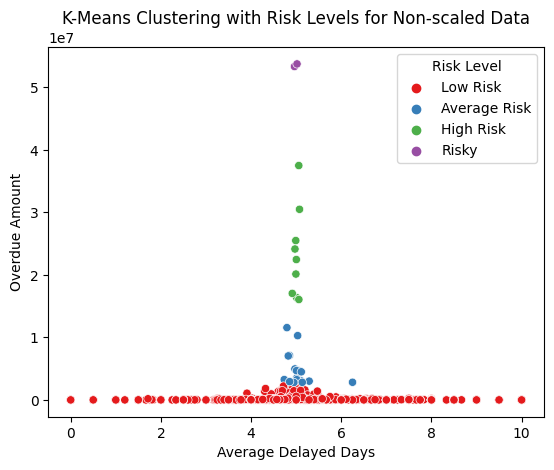

Cluster 0 (Low Risk):
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                362.0            0.901235    1.717577e+05   
419280               2545.0            0.929752    8.948076e+05   
421072               5898.0            0.917319    1.304895e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               3834.0            0.906005    8.050119e+05   
...                     ...                 ...             ...   
2000000429              6.0            1.000000    1.484762e+03   
2000000438             13.0            1.000000    2.482300e+03   
2000000455              0.0            0.000000    0.000000e+00   
2000000467             37.0            0.857143    6.387163e+03   
2000000482             27.0            0.750000    4.095797e+04   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number              

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'Low Risk',
    1: 'Risky',
    2: 'High Risk',
    3: 'Average Risk',
    4: 'High Risk'

}



calculated_data['Risk Level'] = calculated_data['KMeans_Cluster'].map(cluster_risk_mapping)

# Visualize the K-Means clusters with risk levels using scatter plot
sns.scatterplot(x=calculated_data['Average Delayed Days'] , y='Overdue Amount', hue='Risk Level', data=calculated_data, palette='Set1')
plt.title("K-Means Clustering with Risk Levels for Non-scaled Data")
plt.show()

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data[calculated_data['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)


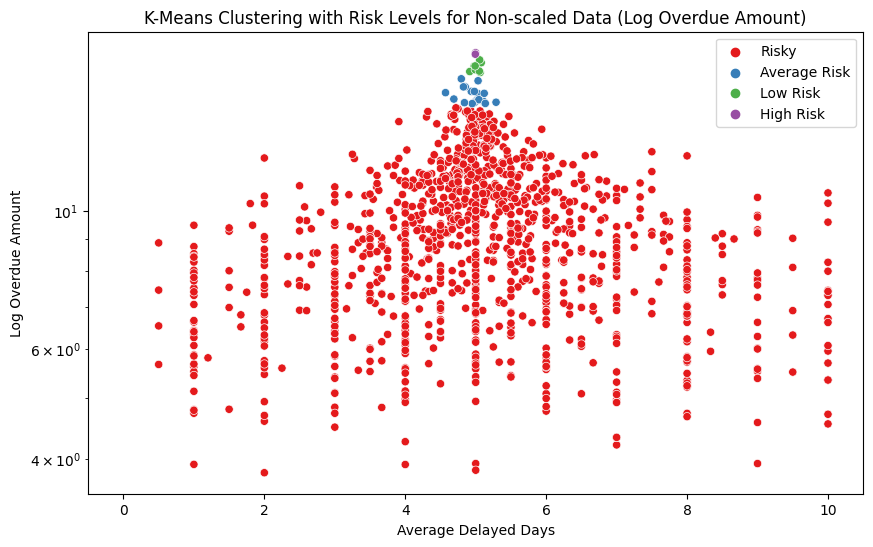

Cluster 0 (Risky):
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                446.0            0.914894    2.226436e+05   
419280               3066.0            0.931389    1.089803e+06   
421072               6024.0            0.918734    1.373389e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               4060.0            0.907178    8.439750e+05   
...                     ...                 ...             ...   
2000000429              6.0            1.000000    1.484762e+03   
2000000438             13.0            1.000000    2.482300e+03   
2000000455              0.0            0.000000    0.000000e+00   
2000000467             37.0            0.857143    6.387163e+03   
2000000482             27.0            0.750000    4.095797e+04   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ... (data loading and K-Means clustering code)

# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'Risky',
    1: 'Low Risk',
    2: 'High Risk',
    3: 'Average Risk'
}

calculated_data['Risk Level'] = calculated_data['KMeans_Cluster'].map(cluster_risk_mapping)

# Visualize the K-Means clusters with risk levels using scatter plot (logarithmic scale for overdue amount)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=calculated_data['Average Delayed Days'], y=np.log1p(calculated_data['Overdue Amount']),
                hue='Risk Level', data=calculated_data, palette='Set1')
plt.yscale('log')
plt.title("K-Means Clustering with Risk Levels for Non-scaled Data (Log Overdue Amount)")
plt.xlabel('Average Delayed Days')
plt.ylabel('Log Overdue Amount')
plt.legend()
plt.show()

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data[calculated_data['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'calculated_data_scaled' is your DataFrame with the scaled features

# Remove any rows with missing values
calculated_data.dropna(inplace=True)

# Choose the number of clusters for K-Means
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
calculated_data_scaled['KMeans_Cluster'] = kmeans.fit_predict(calculated_data_scaled[['Overdue Amount', 'Average Delayed Days']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.25, min_samples=100)
calculated_data_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(calculated_data_scaled[['Overdue Amount', 'Average Delayed Days']])

# Print the results|
print("K-Means Clusters:")
print(calculated_data_scaled.groupby('KMeans_Cluster').size())

print("\nDBSCAN Clusters:")
print(calculated_data_scaled.groupby('DBSCAN_Cluster').size())


K-Means Clusters:
KMeans_Cluster
0    175
1    312
2    551
3    114
dtype: int64

DBSCAN Clusters:
DBSCAN_Cluster
-1    452
 0    700
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


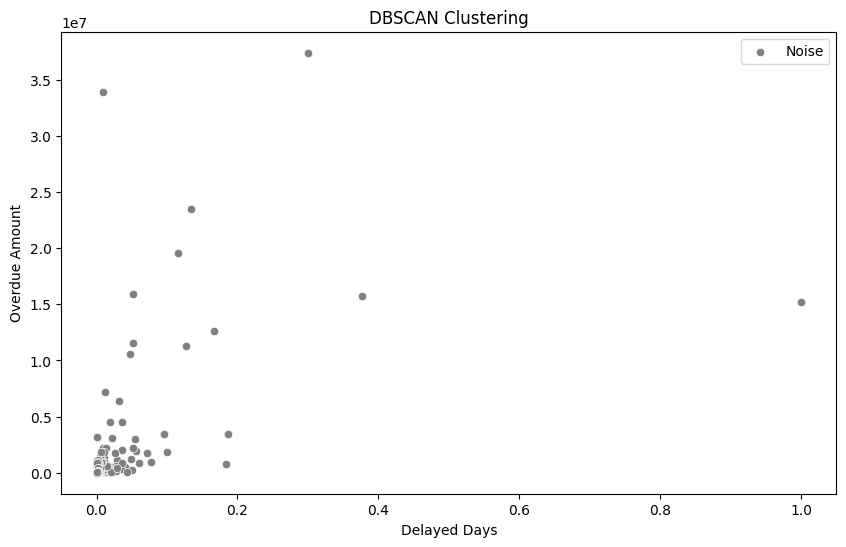

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'calculated_data' contains your data with 'DBSCAN_Cluster' column

# Scatter plot for cluster -1 (Noise points)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delayed Days', y='Overdue Amount', data=calculated_data_scaled[calculated_data_scaled['DBSCAN_Cluster'] == -1], label='Noise', color='gray')

# Scatter plot for cluster 0
sns.scatterplot(x='Delayed Days', y='Overdue Amount', data=calculated_data_scaled[calculated_data_scaled['DBSCAN_Cluster'] == 0], label='Cluster 0', color='blue')

plt.xlabel('Delayed Days')
plt.ylabel('Overdue Amount')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


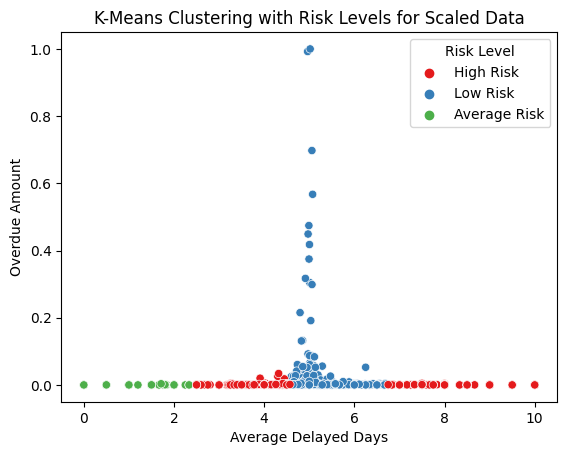

Cluster 0 (High Risk):
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
473586             0.000283                1.00        0.000152   
647792             0.000087                1.00        0.000295   
4408678            0.000305                1.00        0.000059   
1000003992         0.000250                1.00        0.000177   
1000066428         0.000109                1.00        0.000004   
...                     ...                 ...             ...   
1000667191         0.000109                1.00        0.000072   
1000675563         0.000109                1.00        0.000006   
2000000200         0.000076                1.00        0.000058   
2000000393         0.000098                1.00        0.000027   
2000000482         0.000294                0.75        0.000762   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number             

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'High Risk',
    1: 'High Risk',
    2: 'Low Risk',
    3: 'Average Risk'

}



calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

# Visualize the K-Means clusters with risk levels using scatter plot
sns.scatterplot(x=calculated_data_scaled['Average Delayed Days'] , y='Overdue Amount', hue='Risk Level', data=calculated_data_scaled, palette='Set1')
plt.title("K-Means Clustering with Risk Levels for Scaled Data")
plt.show()

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)



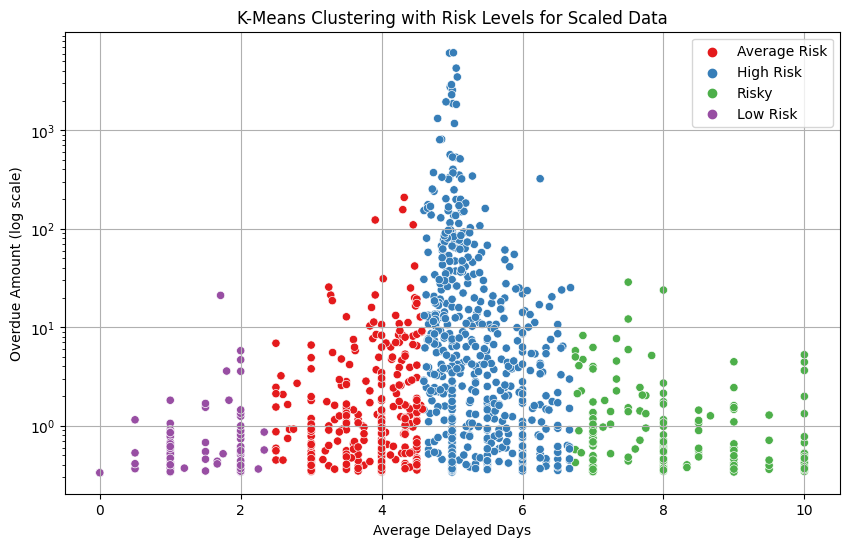

Cluster 0 (Risky):
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
473586             0.000283                1.00        1.261047   
647792             0.000087                1.00        2.135141   
4408678            0.000305                1.00        0.696805   
1000003992         0.000250                1.00        1.413754   
1000066428         0.000109                1.00        0.357239   
...                     ...                 ...             ...   
1000667191         0.000109                1.00        0.774789   
1000675563         0.000109                1.00        0.367136   
2000000200         0.000076                1.00        0.685719   
2000000393         0.000098                1.00        0.495660   
2000000482         0.000294                0.75        4.994898   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                 

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Assuming you have already prepared the DataFrame 'calculated_data' with the necessary columns and KMeans clusters

# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'Risky',
    1: 'Average Risk',
    2: 'High Risk',
    3: 'Low Risk'
}



calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

# Assuming you have a StandardScaler named 'scaler' that you used to scale the data
# Replace 'Overdue Amount_scaled' with the actual name of your scaled column
calculated_data_scaled['Overdue Amount'] = scaler.inverse_transform(calculated_data_scaled[['Overdue Amount']])
#calculated_data_scaled['Average Delayed Days'] = scaler.inverse_transform(calculated_data_scaled[['Average Delayed Days']])

# Set up the figure size
plt.figure(figsize=(10, 6))

# Visualize the K-Means clusters with risk levels using scatter plot
sns.scatterplot(x='Average Delayed Days' , y='Overdue Amount', hue='Risk Level', data=calculated_data_scaled, palette='Set1')
# Set y-axis scale and label
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.ylabel('Overdue Amount (log scale)')

# Add a grid for better visibility
plt.grid()

# Add title and legend
plt.title("K-Means Clustering with Risk Levels for Scaled Data")
plt.legend()

# Show the plot
plt.show()
plt.savefig('K-Means_Clustering.png', dpi=200)

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)


In [ ]:
# Create a dictionary to map cluster numbers to risk labels


# Map the cluster numbers to risk labels and create a new column 'Risk Level'
calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster']
#calculated_data.set_index('Debtor Number', inplace=True)

# Print the resulting DataFrame with risk labels
print(calculated_data_scaled)


               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.004446            0.914894        0.003898   
419280             0.030563            0.931389        0.018394   
421072             0.060050            0.918734        0.023135   
421424             0.000718            0.928571        0.000764   
424282             0.040472            0.907178        0.014285   
...                     ...                 ...             ...   
2000000438         0.000130            1.000000        0.000217   
2000000455         0.000000            0.000000        0.000176   
2000000458         0.006948            0.875000        0.049254   
2000000467         0.000369            0.857143        0.000283   
2000000482         0.000269            0.750000        0.000861   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'calculated_data_scaled' is your DataFrame with the scaled features

# Remove any rows with missing values
calculated_data.dropna(inplace=True)

# Choose the number of clusters for K-Means
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
calculated_data_scaled['KMeans_Cluster'] = kmeans.fit_predict(calculated_data_scaled[['Delayed Purchase Ratio', 'Total Purchase']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.25, min_samples=100)
calculated_data_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(calculated_data_scaled[['Delayed Purchase Ratio', 'Total Purchase']])

# Print the results|
print("K-Means Clusters:")
print(calculated_data_scaled.groupby('KMeans_Cluster').size())

print("\nDBSCAN Clusters:")
print(calculated_data_scaled.groupby('DBSCAN_Cluster').size())


K-Means Clusters:
KMeans_Cluster
0    975
1     39
2    127
3     11
dtype: int64

DBSCAN Clusters:
DBSCAN_Cluster
-1      41
 0    1111
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


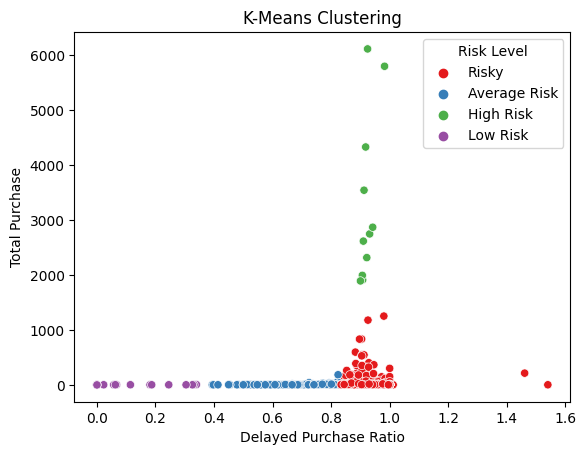

Cluster 0:
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.003942            0.901235        0.003196   
419280             0.027712            0.929752        0.016649   
421072             0.064223            0.917319        0.024279   
421424             0.000784            0.928571        0.000654   
424282             0.041748            0.906005        0.014978   
...                     ...                 ...             ...   
2000000429         0.000065            1.000000        0.000028   
2000000438         0.000142            1.000000        0.000046   
2000000458         0.005129            0.865979        0.054452   
2000000467         0.000403            0.857143        0.000119   
2000000482         0.000294            0.750000        0.000762   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cluster_risk_mapping = {
    0: 'Risky',
    1: 'Low Risk',
    2: 'Average Risk',
    3: 'High Risk'
}



calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

calculated_data_scaled['Total Purchase'] = scaler.inverse_transform(calculated_data_scaled[['Total Purchase']])

# Visualize the K-Means clusters using scatter plot
sns.scatterplot(x='Delayed Purchase Ratio', y='Total Purchase', hue='Risk Level', data=calculated_data_scaled, palette='Set1')
plt.title("K-Means Clustering")

plt.show()

# Analyze members of each K-Means cluster
for cluster_num in range(num_clusters):
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_members)


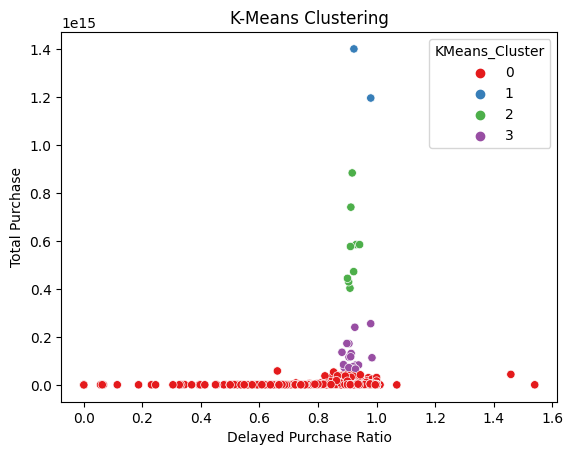

Cluster 0:
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.004446            0.914894        0.003898   
419280             0.030563            0.931389        0.018394   
421072             0.060050            0.918734        0.023135   
421424             0.000718            0.928571        0.000764   
424282             0.040472            0.907178        0.014285   
...                     ...                 ...             ...   
2000000438         0.000130            1.000000        0.000217   
2000000455         0.000000            0.000000        0.000176   
2000000458         0.006948            0.875000        0.049254   
2000000467         0.000369            0.857143        0.000283   
2000000482         0.000269            0.750000        0.000861   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
calculated_data_scaled['Total Purchase'] = scaler.inverse_transform(calculated_data_scaled[['Total Purchase']])

# Visualize the K-Means clusters using scatter plot
sns.scatterplot(x='Delayed Purchase Ratio', y='Total Purchase', hue='KMeans_Cluster', data=calculated_data_scaled, palette='Set1')
plt.title("K-Means Clustering")
plt.show()

# Analyze members of each K-Means cluster
for cluster_num in range(num_clusters):
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_members)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'calculated_data_scaled' is your DataFrame with the scaled features

# Remove any rows with missing values
calculated_data.dropna(inplace=True)

# Choose the number of clusters for K-Means
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
calculated_data_scaled['KMeans_Cluster'] = kmeans.fit_predict(calculated_data_scaled[['Delayed Days Ratio', 'Total Purchase']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.25, min_samples=100)
calculated_data_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(calculated_data_scaled[['Delayed Days Ratio', 'Total Purchase']])

# Print the results|
print("K-Means Clusters:")
print(calculated_data_scaled.groupby('KMeans_Cluster').size())

print("\nDBSCAN Clusters:")
print(calculated_data_scaled.groupby('DBSCAN_Cluster').size())


K-Means Clusters:
KMeans_Cluster
0     11
1    979
2    134
3     28
dtype: int64

DBSCAN Clusters:
DBSCAN_Cluster
-1      33
 0    1119
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


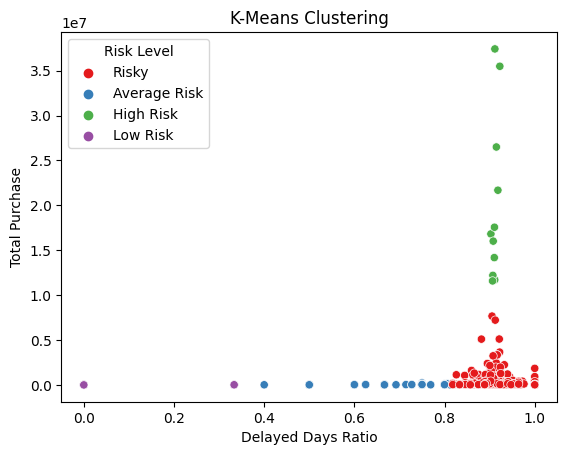

Cluster 0:
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
1868550            0.399734            0.902787        0.449159   
1000103077         1.000000            0.907912        0.417807   
1000103113         0.245198            0.911616        0.992276   
1000120827         0.122447            0.918321        0.567280   
1000137541         0.046768            0.911319        0.304431   
1000210861         0.127935            0.907152        0.317037   
1000444471         0.182510            0.910310        0.374634   
1000518628         0.146293            0.914910        0.697552   
1000531719         0.008472            0.922581        1.000000   
1000548517         0.049480            0.906459        0.298777   
1000609137         0.056579            0.910663        0.474322   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cluster_risk_mapping = {
    0: 'High Risk',
    1: 'Risky',
    2: 'Average Risk',
    3: 'Low Risk'
}



calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

calculated_data_scaled['Total Purchase'] = scaler.inverse_transform(calculated_data_scaled[['Total Purchase']])

# Visualize the K-Means clusters using scatter plot
sns.scatterplot(x='Delayed Days Ratio', y='Total Purchase', hue='Risk Level', data=calculated_data_scaled, palette='Set1')
plt.title("K-Means Clustering")
plt.show()

# Analyze members of each K-Means cluster
for cluster_num in range(num_clusters):
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_members)


In [ ]:
calculated_data_scaled.set_index('Debtor Number', inplace=True)


KeyError: ignored

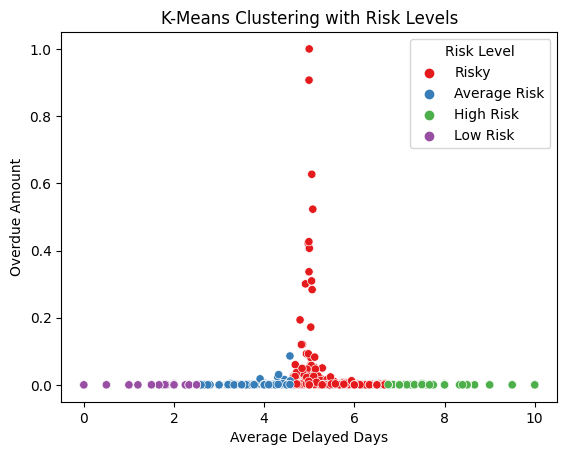

Cluster 0 (Risky):
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.004446            0.914894        0.003898   
419280             0.030563            0.931389        0.018394   
421072             0.060050            0.918734        0.023135   
421424             0.000718            0.928571        0.000764   
424282             0.040472            0.907178        0.014285   
...                     ...                 ...             ...   
2000000418         0.001725            0.933333        0.002230   
2000000429         0.000060            1.000000        0.000201   
2000000438         0.000130            1.000000        0.000217   
2000000458         0.006948            0.875000        0.049254   
2000000467         0.000369            0.857143        0.000283   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'Risky',
    1: 'High Risk',
    2: 'Low Risk',
    3: 'Average Risk'
}

calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

# Visualize the K-Means clusters with risk levels using scatter plot
sns.scatterplot(x=calculated_data_scaled['Average Delayed Days'] , y='Overdue Amount', hue='Risk Level', data=calculated_data_scaled, palette='Set1')
plt.title("K-Means Clustering with Risk Levels")
plt.show()

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)


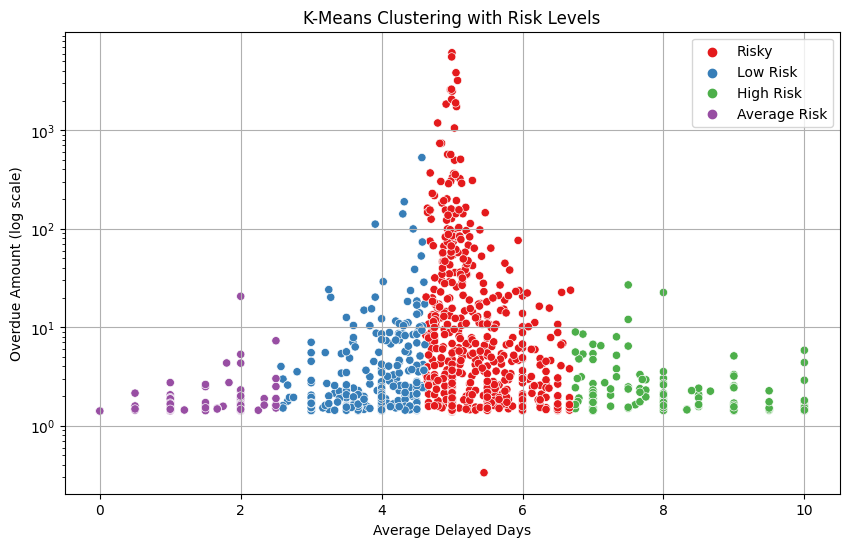

Cluster 0 (Risky):
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.004446            0.914894       24.176640   
419280             0.030563            0.931389      112.849149   
421072             0.060050            0.918734      141.847551   
421424             0.000718            0.928571        5.005761   
424282             0.040472            0.907178       87.711651   
...                     ...                 ...             ...   
2000000418         0.001725            0.933333       13.975822   
2000000429         0.000060            1.000000        1.561767   
2000000438         0.000130            1.000000        1.663772   
2000000458         0.006948            0.875000      301.621676   
2000000467         0.000369            0.857143        2.063068   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                 

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your data and preprocess it
# ...

# Assuming you have already prepared the DataFrame 'calculated_data' with the necessary columns and KMeans clusters

# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'Risky',
    1: 'High Risk',
    2: 'Average Risk',
    3: 'Low Risk'
}



calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

# Assuming you have a StandardScaler named 'scaler' that you used to scale the data
# Replace 'Overdue Amount_scaled' with the actual name of your scaled column
calculated_data_scaled['Overdue Amount'] = scaler.inverse_transform(calculated_data_scaled[['Overdue Amount']])
#calculated_data_scaled['Average Delayed Days'] = scaler.inverse_transform(calculated_data_scaled[['Average Delayed Days']])

# Set up the figure size
plt.figure(figsize=(10, 6))

# Visualize the K-Means clusters with risk levels using scatter plot
sns.scatterplot(x='Average Delayed Days' , y='Overdue Amount', hue='Risk Level', data=calculated_data_scaled, palette='Set1')
# Set y-axis scale and label
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.ylabel('Overdue Amount (log scale)')

# Add a grid for better visibility
plt.grid()

# Add title and legend
plt.title("K-Means Clustering with Risk Levels")
plt.legend()

# Show the plot
plt.show()
plt.savefig('K-Means_Clustering.png', dpi=200)

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)


In [ ]:
print(calculated_data)

               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046                446.0            0.914894    2.226436e+05   
419280               3066.0            0.931389    1.089803e+06   
421072               6024.0            0.918734    1.373389e+06   
421424                 72.0            0.928571    3.516480e+04   
424282               4060.0            0.907178    8.439750e+05   
...                     ...                 ...             ...   
2000000438             13.0            1.000000    2.482300e+03   
2000000455              0.0            0.000000    0.000000e+00   
2000000458            697.0            0.875000    2.935877e+06   
2000000467             37.0            0.857143    6.387163e+03   
2000000482             27.0            0.750000    4.095797e+04   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'calculated_data_scaled' is your DataFrame with the scaled features

# Remove any rows with missing values
calculated_data.dropna(inplace=True)

# Choose the number of clusters for K-Means
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
calculated_data['KMeans_Cluster'] = kmeans.fit_predict(calculated_data[['Delayed Days Ratio', 'Delayed Purchase Ratio']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=100)
calculated_data['DBSCAN_Cluster'] = dbscan.fit_predict(calculated_data[['Delayed Days Ratio', 'Delayed Purchase Ratio']])

# Print the results|
print("K-Means Clusters:")
print(calculated_data.groupby('KMeans_Cluster').size())

print("\nDBSCAN Clusters:")
print(calculated_data.groupby('DBSCAN_Cluster').size())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clusters:
KMeans_Cluster
0    353
1     31
2    698
3     72
dtype: int64

DBSCAN Clusters:
DBSCAN_Cluster
-1     130
 0    1024
dtype: int64


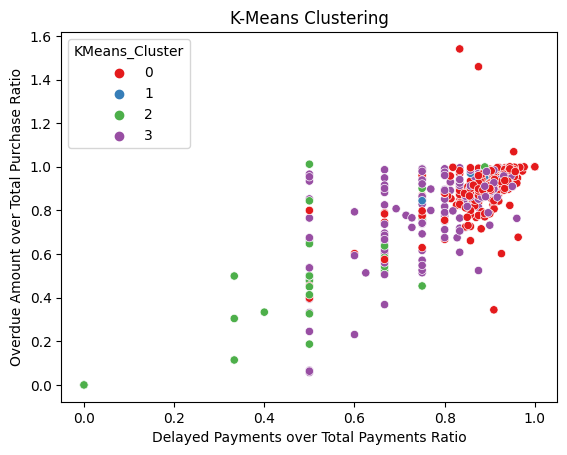

Cluster 0:
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.004446            0.914894       24.176640   
419280             0.030563            0.931389      112.849149   
421072             0.060050            0.918734      141.847551   
421424             0.000718            0.928571        5.005761   
424282             0.040472            0.907178       87.711651   
...                     ...                 ...             ...   
2000000418         0.001725            0.933333       13.975822   
2000000429         0.000060            1.000000        1.561767   
2000000438         0.000130            1.000000        1.663772   
2000000458         0.006948            0.875000      301.621676   
2000000467         0.000369            0.857143        2.063068   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the K-Means clusters using scatter plot
sns.scatterplot(x='Delayed Days Ratio', y='Delayed Purchase Ratio', hue='KMeans_Cluster', data=calculated_data_scaled, palette='Set1')
plt.title("K-Means Clustering")
plt.ylabel("Overdue Amount over Total Purchase Ratio")
plt.xlabel("Delayed Payments over Total Payments Ratio")
plt.show()

# Analyze members of each K-Means cluster
for cluster_num in range(num_clusters):
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_members)


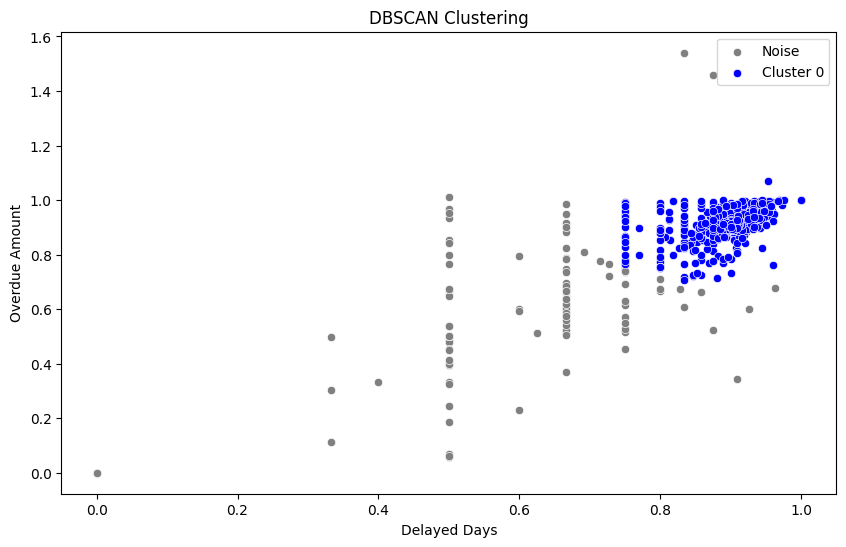

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'calculated_data' contains your data with 'DBSCAN_Cluster' column

# Scatter plot for cluster -1 (Noise points)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delayed Days Ratio', y='Delayed Purchase Ratio', data=calculated_data[calculated_data['DBSCAN_Cluster'] == -1], label='Noise', color='gray')

# Scatter plot for cluster 0
sns.scatterplot(x='Delayed Days Ratio', y='Delayed Purchase Ratio', data=calculated_data[calculated_data['DBSCAN_Cluster'] == 0], label='Cluster 0', color='blue')

plt.xlabel('Delayed Days')
plt.ylabel('Overdue Amount')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'calculated_data_scaled' is your DataFrame with the scaled features

# Remove any rows with missing values
calculated_data.dropna(inplace=True)

# Choose the number of clusters for K-Means
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
calculated_data['KMeans_Cluster'] = kmeans.fit_predict(calculated_data_scaled[['Delayed Days Ratio', 'Delayed Purchase Ratio']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=100)
calculated_data['DBSCAN_Cluster'] = dbscan.fit_predict(calculated_data[['Delayed Days Ratio', 'Delayed Purchase Ratio']])

# Print the results|
print("K-Means Clusters:")
print(calculated_data.groupby('KMeans_Cluster').size())

print("\nDBSCAN Clusters:")
print(calculated_data.groupby('DBSCAN_Cluster').size())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clusters:
KMeans_Cluster
0    353
1     31
2    698
3     72
dtype: int64

DBSCAN Clusters:
DBSCAN_Cluster
-1     130
 0    1024
dtype: int64


In [ ]:
import os
from google.colab import files

local_download_path = os.path.expanduser('/content')



# Save the plot to a file
plot_filepath = os.path.join(local_download_path, "my_plot.png")
plt.savefig(plot_filepath, dpi=300)

# Download the saved plot
files.download(plot_filepath)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
local_download_path = os.path.expanduser('/content/plot.png')
plot_filepath = os.path.join('/content/K-Means_Clustering.png', "plot.png")

plt.savefig(plot_filepath)

from google.colab import files
files.download(plot_filepath)

NotADirectoryError: ignored

<Figure size 640x480 with 0 Axes>

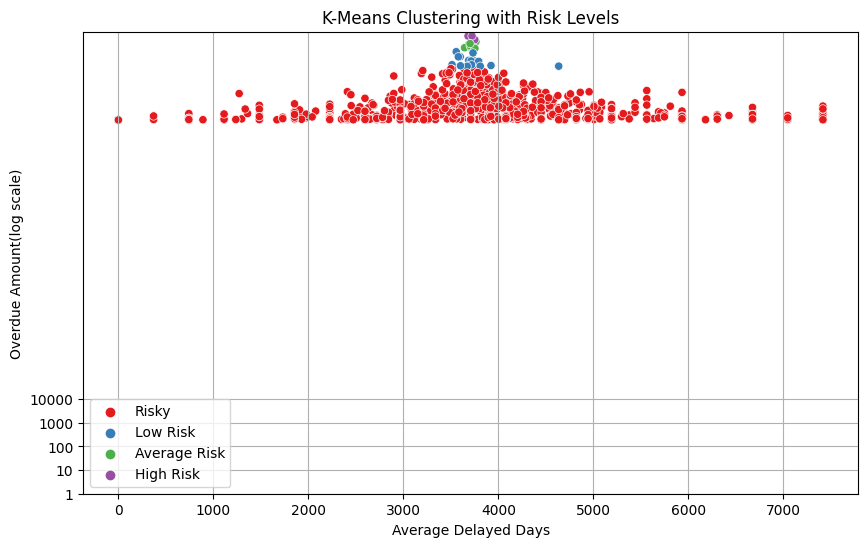

Cluster 0 (Risky):
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046            29.232458            0.901235    7.796075e+16   
419280           205.515484            0.929752    3.796430e+17   
421072           476.279106            0.917319    5.507460e+17   
421424             5.814191            0.928571    2.096930e+16   
424282           309.605645            0.906005    3.421770e+17   
...                     ...                 ...             ...   
2000000429         0.484516            1.000000    6.916791e+15   
2000000438         1.049784            1.000000    7.333000e+15   
2000000455         0.000000            0.000000    6.297295e+15   
2000000467         2.987848            0.857143    8.962248e+15   
2000000482         2.180321            0.750000    2.338642e+16   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your data and preprocess it
# ...

# Assuming you have already prepared the DataFrame 'calculated_data_scaled' with the scaled features and KMeans clusters

# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'Risky',
    1: 'High Risk',
    2: 'Average Risk',
    3: 'Low Risk'
}

calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Visualize the K-Means clusters with risk levels using scatter plot
sns.scatterplot(x='Average Delayed Days', y='Overdue Amount', hue='Risk Level', data=calculated_data_scaled, palette='Set1')

# Use log scale for y-axis
plt.yscale('log')

# Set y-axis ticks as needed for your data distribution
yticks = [1, 10, 100, 1000, 10000]  # Adjust as needed
plt.yticks(yticks, yticks)


# Add a grid for better visibility
plt.grid()

# Add title and legend
plt.title("K-Means Clustering with Risk Levels")
plt.legend()
plt.ylabel('Overdue Amount(log scale)')
# Show the plot
plt.show()

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)


IndexError: ignored

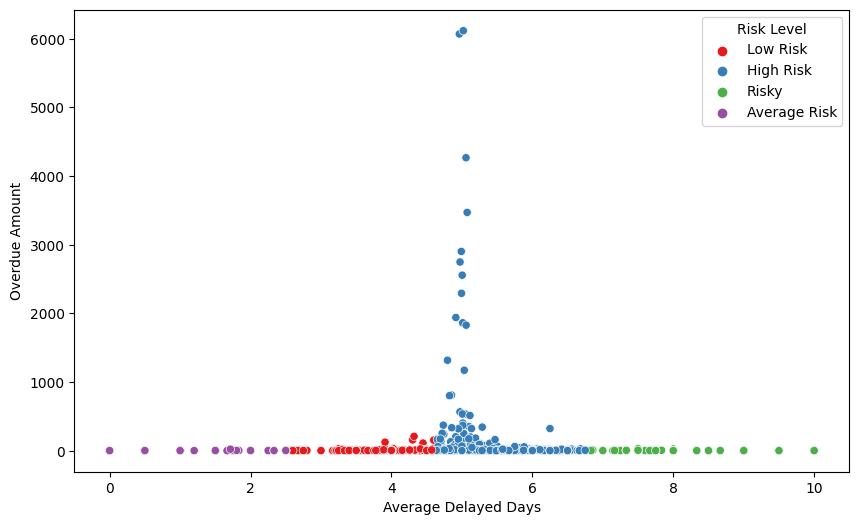

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your data and preprocess it
# ...

# Assuming you have already prepared the DataFrame 'calculated_data_scaled' with the scaled features and KMeans clusters

# Map KMeans clusters to risk levels
cluster_risk_mapping = {
    0: 'Risky',
    1: 'High Risk',
    2: 'Average Risk',
    3: 'Low Risk'
}

calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Visualize the K-Means clusters with risk levels using scatter plot
sns.scatterplot(x='Average Delayed Days', y='Overdue Amount', hue='Risk Level', data=calculated_data_scaled, palette='Set1')

# Reverse the scaling of the y-axis values to the original range
ax = plt.gca()
yticks_scaled = ax.get_yticks()
yticks_original = yticks_scaled * scaler.data_range_['Overdue Amount'] + scaler.data_min_['Overdue Amount']
ax.set_yticklabels(["{:,.0f}".format(y) for y in yticks_original])

# Add a grid for better visibility
plt.grid()

# Add title and legend
plt.title("K-Means Clustering with Risk Levels")
plt.legend()

# Show the plot
plt.show()

# Analyze members of each K-Means cluster with risk levels
for cluster_num, risk_level in cluster_risk_mapping.items():
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} ({risk_level}):")
    print(cluster_members)


In [ ]:
calculated_data_scaled

,Delayed Days,Delayed Days Ratio,Overdue Amount,Total Purchase,Delayed Purchase Ratio,Average Delayed Days,Records 2020,Records 2021,Records 2022,Average Records,Number of Records,KMeans_Cluster,DBSCAN_Cluster,Risk Level
Debtor Number,,,,,,,,,,,,,,
413046,0.003942,0.901235,0.003476,0.003641,0.591126,0.446914,0.003629,0.005292,0.004045,0.004359,81,1,0,1
419280,0.027712,0.929752,0.016925,0.017235,0.596974,0.525826,0.003629,0.006762,0.057039,0.026320,484,0,0,0
421072,0.064223,0.917319,0.024553,0.025133,0.592904,0.513316,0.090975,0.087608,0.023867,0.062558,1149,0,0,0
421424,0.000784,0.928571,0.000935,0.000996,0.634162,0.514286,0.000968,0.001176,0.000270,0.000708,14,0,0,0
424282,0.041748,0.906005,0.015255,0.016874,0.548821,0.500522,0.086620,0.031751,0.025890,0.041687,766,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000000438,0.000142,1.000000,0.000327,0.000415,0.649209,0.650000,0.000000,0.000294,0.000000,0.000054,2,0,0,0
2000000455,0.000000,0.000000,0.000281,0.000000,0.000000,0.000000,0.000242,0.000000,0.000000,0.000000,1,3,-1,3
2000000458,0.005129,0.865979,0.054718,0.035084,0.948546,0.485567,0.000000,0.006027,0.007551,0.005231,97,0,0,0


In [ ]:
cluster_risk_mapping = {
    0: 'Risky',
    3: 'Average Risk',
    2: 'Low Risk',
    3: 'High Risk'
}

debtor = int(input("Enter debtor number: "))

# Find the risk level of the debtor
risk_level = calculated_data_scaled.loc[debtor, 'Risk Level']

# Get the risk level based on the mapping
risk = cluster_risk_mapping.get(risk_level)

print(f"Risk level: {risk}")


Enter debtor number: 427437
Risk level: Low Risk


In [ ]:
# Create a dictionary to map cluster numbers to risk labels
cluster_risk_mapping = {
    0: 'Low Risk',
    3: 'Average Risk',
    2: 'Risky',
    1: 'High Risk'
}

# Map the cluster numbers to risk labels and create a new column 'Risk Level'
calculated_data_scaled['Risk Level'] = calculated_data_scaled['KMeans_Cluster'].map(cluster_risk_mapping)
#calculated_data.set_index('Debtor Number', inplace=True)

# Print the resulting DataFrame with risk labels
print(calculated_data_scaled)


               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.003942            0.901235        0.003476   
419280             0.027712            0.929752        0.016925   
421072             0.064223            0.917319        0.024553   
421424             0.000784            0.928571        0.000935   
424282             0.041748            0.906005        0.015255   
...                     ...                 ...             ...   
2000000438         0.000142            1.000000        0.000327   
2000000455         0.000000            0.000000        0.000281   
2000000458         0.005129            0.865979        0.054718   
2000000467         0.000403            0.857143        0.000400   
2000000482         0.000294            0.750000        0.001043   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
# Group the data by 'Risk Level' and calculate the range for 'Overdue Amount' and 'Average Delayed Days'
risk_level_ranges = calculated_data_scaled.groupby('Risk Level')['Overdue Amount', 'Average Delayed Days'].agg(['min', 'max'])

# Print the resulting range for each risk level
print(risk_level_ranges)


             Overdue Amount           Average Delayed Days          
                        min       max                  min       max
Risk Level                                                          
Average Risk       0.000281  0.003667                0.000  0.233333
High Risk          0.000282  0.034195                0.250  0.457895
Low Risk           0.000000  1.000000                0.460  0.668182
Risky              0.000282  0.004914                0.675  1.000000


<ipython-input-112-8cf483d0ddb5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  risk_level_ranges = calculated_data_scaled.groupby('Risk Level')['Overdue Amount', 'Average Delayed Days'].agg(['min', 'max'])


In [ ]:
# Assuming 'debtor_number' is the debtor number for which you want to find the risk level
# and 'calculated_data' contains the dataset with the risk levels

def get_risk_level(debtor_number):
    risk_level = calculated_data_scaled.loc[debtor_number, 'Risk Level']
    return risk_level

# Assuming 'debtor_number' is the debtor number for which you want to find the risk level
# and 'calculated_data' contains the dataset with the risk levels

def get_debtor_info(debtor_number):
    risk_level_info = calculated_data_scaled.loc[debtor_number, ['Overdue Amount', 'Delayed Days Ratio', 'Delayed Purchase Ratio', 'Total Purchase', 'Average Delayed Days', 'Average Records']]
    return risk_level_info
    cluster_risk_mapping = {
    0: 'Low Risk',
    3: 'Average Risk',
    2: 'Risky',
    1: 'High Risk'
}



# Find the risk level of the debtor


# Get the risk level based on the mapping



debtor_number = int(input("Enter debtor number"))
# Replace with the actual debtor number
risk_level_info = get_debtor_info(debtor_number)  # Replace with the actual debtor number
risk_level = get_risk_level(debtor_number)
risk = cluster_risk_mapping.get(risk_level)
print(f'Debtor Number: {debtor_number}, Risk Level: {risk}')
print("Debtor Information:")
print(risk_level_info)


Enter debtor number427437
Debtor Number: 427437, Risk Level: None
Debtor Information:
Overdue Amount            0.010046
Delayed Days Ratio        0.913545
Delayed Purchase Ratio    0.592286
Total Purchase            0.010344
Average Delayed Days      0.486167
Average Records           0.018855
Name: 427437, dtype: object


In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=200)
calculated_data['DBSCAN_Cluster'] = dbscan.fit_predict(calculated_data[['Overdue Amount','Delayed Days']])



print("\nDBSCAN Clusters:")
print(calculated_data.groupby('DBSCAN_Cluster').size())


DBSCAN Clusters:
DBSCAN_Cluster
-1    1154
dtype: int64


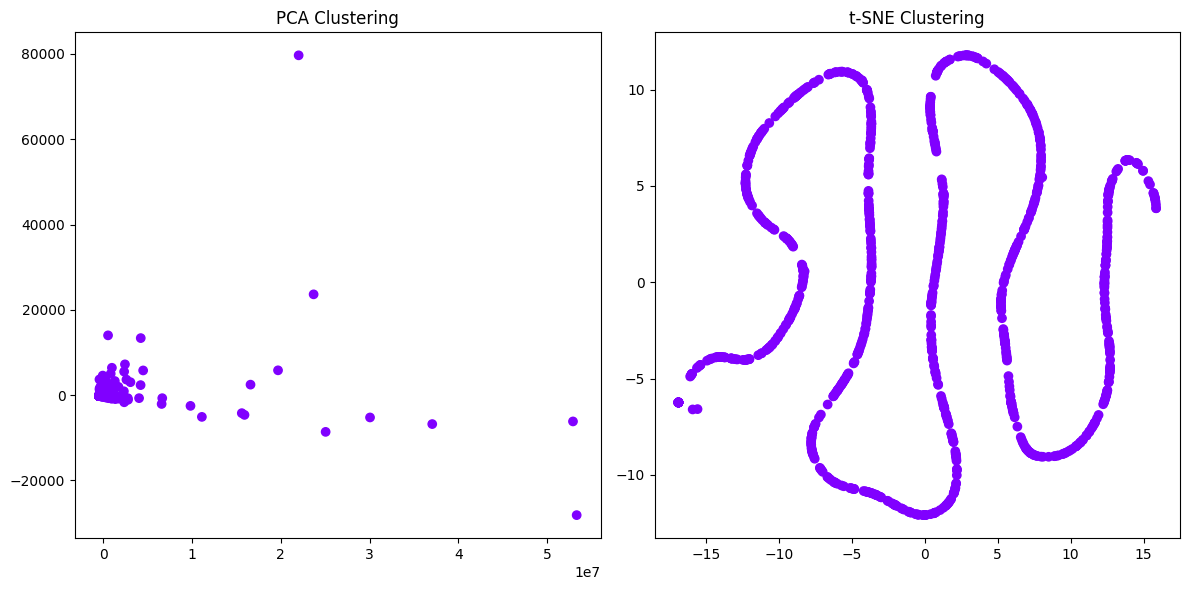

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming you have already prepared the DataFrame 'calculated_data' with the cluster labels

# Extract the cluster labels
cluster_labels = calculated_data['DBSCAN_Cluster']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(calculated_data.drop('DBSCAN_Cluster', axis=1)[['Overdue Amount','Delayed Days']])

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(calculated_data.drop('DBSCAN_Cluster', axis=1)[['Overdue Amount','Delayed Days']])

# Visualize using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('PCA Clustering')

# Visualize using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('t-SNE Clustering')

plt.tight_layout()
plt.show()


In [ ]:
print(calculated_data_scaled)

               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.003942            0.901235        0.003476   
419280             0.027712            0.929752        0.016925   
421072             0.064223            0.917319        0.024553   
421424             0.000784            0.928571        0.000935   
424282             0.041748            0.906005        0.015255   
...                     ...                 ...             ...   
2000000438         0.000142            1.000000        0.000327   
2000000455         0.000000            0.000000        0.000281   
2000000458         0.005129            0.865979        0.054718   
2000000467         0.000403            0.857143        0.000400   
2000000482         0.000294            0.750000        0.001043   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
# Assuming your data is stored in a DataFrame named 'data'

# Select the features for PCA
features = ['Delayed Days', 'Delayed Days Ratio', 'Overdue Amount', 'Total Purchase',
            'Delayed Purchase Ratio', 'Average Delayed Days',
            'Records 2020', 'Records 2021', 'Records 2022']

# Separate the features from the target variable if applicable
# target = data['Target Column']
# features_data = data[features]



# Apply PCA

pca = PCA(n_components=2)  # Choose n_components to explain at least 99% variance
pca_result = pca.fit_transform(calculated_data[['Overdue Amount','Delayed Days']])
num_clusters=4
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Add target variable column back if applicable
# pca_df['Target Column'] = target

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the number of components selected
print("Number of Components:", pca.n_components_)

# Print the first few rows of the PCA DataFrame
print(pca_df.head())


Explained Variance Ratio: [9.99999231e-01 7.68724233e-07]
Number of Components: 2
             PC1          PC2
0 -265857.211100    94.060678
1  457193.732112  1890.717887
2  867282.737658  5024.598176
3 -402450.279055  -122.954478
4  367398.703673  3227.697664


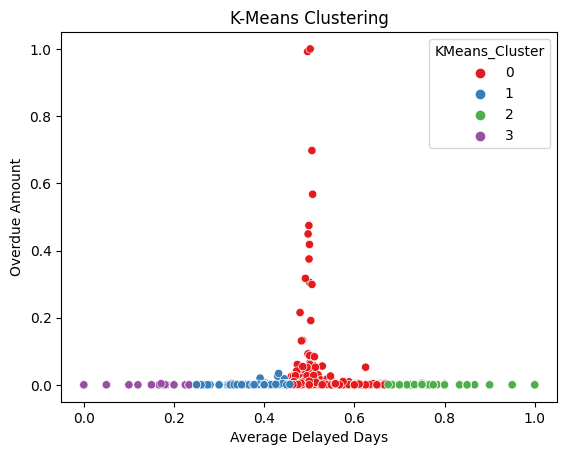

Cluster 0:
               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
419280             0.027712            0.929752        0.016925   
421072             0.064223            0.917319        0.024553   
421424             0.000784            0.928571        0.000935   
424282             0.041748            0.906005        0.015255   
425272             0.001982            0.941176        0.002488   
...                     ...                 ...             ...   
2000000418         0.001862            0.964286        0.002426   
2000000429         0.000065            1.000000        0.000308   
2000000438         0.000142            1.000000        0.000327   
2000000458         0.005129            0.865979        0.054718   
2000000467         0.000403            0.857143        0.000400   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_clusters=4
# Visualize the K-Means clusters using scatter plot
sns.scatterplot(x='Average Delayed Days', y='Overdue Amount', hue='KMeans_Cluster', data=calculated_data_scaled, palette='Set1')
plt.title("K-Means Clustering")
plt.show()

# Analyze members of each K-Means cluster
for cluster_num in range(num_clusters):
    cluster_members = calculated_data_scaled[calculated_data_scaled['KMeans_Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_members)


In [ ]:
import random

# Define the interest rate ranges
interest_rate_ranges = {
    'Low Interest Rate': (0.05, 0.10),
    'Medium Interest Rate': (0.10, 0.15),
    'High Interest Rate': (0.15, 0.20)
}

# Map the scaled features to interest rate ranges based on rules
def calculate_interest_rate_range(scaled_features):
    if scaled_features['Total Purchase'] > 0.8 and scaled_features['Overdue Amount'] < 0.2:
        return 'Low Interest Rate'
    elif scaled_features['Average Delayed Days'] > 0.7 and scaled_features['Delayed Days Ratio'] > 0.7:
        return 'High Interest Rate'
    elif scaled_features['Average Records'] < 0.3:
        return 'High Interest Rate'
    else:
        return 'Medium Interest Rate'

# Apply the function to calculate interest rate ranges for each customer
calculated_data_scaled['Interest Rate Range'] = calculated_data_scaled.apply(calculate_interest_rate_range, axis=1)

# Assign a random interest rate within the range for each customer
def assign_random_interest_rate(interest_rate_range):
    min_rate, max_rate = interest_rate_ranges[interest_rate_range]
    return round(random.uniform(min_rate, max_rate), 4)

calculated_data_scaled['Interest Rate'] = calculated_data_scaled['Interest Rate Range'].apply(assign_random_interest_rate)


In [ ]:
print(calculated_data_scaled)

               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
413046             0.003942            0.901235        0.003476   
419280             0.027712            0.929752        0.016925   
421072             0.064223            0.917319        0.024553   
421424             0.000784            0.928571        0.000935   
424282             0.041748            0.906005        0.015255   
...                     ...                 ...             ...   
2000000438         0.000142            1.000000        0.000327   
2000000455         0.000000            0.000000        0.000281   
2000000458         0.005129            0.865979        0.054718   
2000000467         0.000403            0.857143        0.000400   
2000000482         0.000294            0.750000        0.001043   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                    

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# Step 1: Define Antecedent and Consequent Variables
payment_delay = ctrl.Antecedent(np.arange(0, 31, 1), 'payment_delay')
overdue_amount = ctrl.Antecedent(np.arange(0, 20001, 1), 'overdue_amount')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Step 2: Define Membership Functions for Antecedent and Consequent Variables
# Define membership functions for payment_delay and overdue_amount
# ...

# Define membership functions for risk (linguistic terms)
# ...

# Step 3: Create Fuzzy Rules
rule1 = ctrl.Rule(payment_delay['low'] & overdue_amount['low'], risk['low'])
rule2 = ctrl.Rule(payment_delay['medium'] | overdue_amount['medium'], risk['medium'])
rule3 = ctrl.Rule(payment_delay['high'] & overdue_amount['high'], risk['high'])

# Step 4: Fuzzy Logic Inference
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

# Input actual values for payment_delay and overdue_amount
risk_simulation.input['payment_delay'] = 10
risk_simulation.input['overdue_amount'] = 1500

# Perform inference and get the risk score
risk_simulation.compute()
risk_score = risk_simulation.output['risk']

# Step 5: Calculate Reliability
num_records = 5  # Example number of records
impact_factor = 0.1  # Adjust this based on your context

reliability = 1 + (num_records - 1) * impact_factor

# Adjust risk score based on reliability
adjusted_risk_score = risk_score * reliability

# Step 6: Interpret and Categorize Risk
if adjusted_risk_score <= 33:
    risk_category = 'Low'
elif adjusted_risk_score <= 66:
    risk_category = 'Medium'
else:
    risk_category = 'High'

# Print risk assessment results
print("Adjusted Risk Score:", adjusted_risk_score)
print("Risk Category:", risk_category)


ModuleNotFoundError: ignored

In [ ]:
ceva['delayed_days'] = (ceva['Invoice Paid Date'] - ceva['Invoice Due Date']).dt.days
print(ceva)

      Invoice Issue Date  Debtor Number  Net Amount  VAT Amount  Total Amount  \
413           2020-04-07         413046     2434.75         0.0      2434.750   
519           2020-04-09         413046     1568.90         0.0      1568.900   
3741          2020-05-21         413046     2281.92         0.0      2281.920   
3949          2020-05-25         413046       90.00         0.0       112.500   
5273          2020-06-08         413046      275.00         0.0       343.750   
...                  ...            ...         ...         ...           ...   
88899         2022-11-15     2000000467     1343.92         0.0      1679.900   
56763         2022-01-31     2000000482    18662.30         0.0     23327.875   
62061         2022-03-17     2000000482     6033.38         0.0      7541.725   
63931         2022-04-04     2000000482     8070.70         0.0     10088.375   
63929         2022-04-04     2000000482     6033.38         0.0      7541.725   

       GST on Imported Good

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# Step 1: Define Antecedent and Consequent Variables
payment_delay = ctrl.Antecedent(np.arange(0, 31, 1), 'payment_delay')
overdue_amount = ctrl.Antecedent(np.arange(0, 20001, 1), 'overdue_amount')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')



# Define membership functions for risk (linguistic terms)
# ...
payment_delay['low'] = fuzz.trimf(payment_delay.universe, [0, 0, 4])
payment_delay['medium'] = fuzz.trimf(payment_delay.universe, [0, 4, 7])
payment_delay['high'] = fuzz.trimf(payment_delay.universe, [4, 7, 10])

# Define membership functions for overdue_amount
overdue_amount['low'] = fuzz.trimf(overdue_amount.universe, [0, 0, 500])
overdue_amount['medium'] = fuzz.trimf(overdue_amount.universe, [300, 500, 1000000])
overdue_amount['high'] = fuzz.trimf(overdue_amount.universe, [1000, 1000000, 60000000])

# Define membership functions for risk
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medium'] = fuzz.trimf(risk.universe, [0, 50, 100])
risk['high'] = fuzz.trimf(risk.universe, [50, 100, 100])
# Step 3: Create Fuzzy Rules
rule1 = ctrl.Rule(payment_delay['low'] & overdue_amount['low'], risk['low'])
rule2 = ctrl.Rule(payment_delay['medium'] | overdue_amount['medium'], risk['medium'])
rule3 = ctrl.Rule(payment_delay['high'] & overdue_amount['high'], risk['high'])

# Step 4: Fuzzy Logic Inference
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

# Input actual values for payment_delay and overdue_amount
risk_simulation.input['payment_delay'] = 10
risk_simulation.input['overdue_amount'] = 150000

# Perform inference and get the risk score
risk_simulation.compute()
risk_score = risk_simulation.output['risk']

# Step 5: Calculate Reliability
num_records = 10 # Example number of records
impact_factor = 0.1  # Adjust this based on your context

reliability = (num_records - 1) * impact_factor

# Calculate upper and lower bounds around the risk score
upper_bound = risk_score * (1 + impact_factor)
lower_bound = risk_score * (1 - impact_factor)

# Step 6: Interpret and Categorize Risk
if lower_bound <= 50 <= upper_bound:
    risk_category = 'Low'
elif lower_bound <= 75 <= upper_bound:
    risk_category = 'Medium'
else:
    risk_category = 'High'

# Print risk assessment results
print("Risk Score:", risk_score)
print("Risk Category:", risk_category)
print("Reliability:", f"{reliability*100:.2f}%")
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)


Risk Score: 50.000000000000014
Risk Category: Low
Reliability: 90.00%
Upper Bound: 55.00000000000002
Lower Bound: 45.000000000000014


In [ ]:

import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# Step 1: Define Antecedent and Consequent Variables
payment_delay = ctrl.Antecedent(np.arange(0, 31, 1), 'payment_delay')
overdue_amount = ctrl.Antecedent(np.arange(0, 20001, 1), 'overdue_amount')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')


# Define membership functions for risk (linguistic terms)
# ...
payment_delay['low'] = fuzz.trimf(payment_delay.universe, [0, 0, 15])
payment_delay['medium'] = fuzz.trimf(payment_delay.universe, [0, 15, 30])
payment_delay['high'] = fuzz.trimf(payment_delay.universe, [15, 30, 30])

# Define membership functions for overdue_amount
overdue_amount['low'] = fuzz.trimf(overdue_amount.universe, [0, 0, 1000])
overdue_amount['medium'] = fuzz.trimf(overdue_amount.universe, [0, 1000, 2000])
overdue_amount['high'] = fuzz.trimf(overdue_amount.universe, [1000, 2000, 2000])

# Define membership functions for risk
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medium'] = fuzz.trimf(risk.universe, [0, 50, 100])
risk['high'] = fuzz.trimf(risk.universe, [50, 100, 100])
# Step 3: Create Fuzzy Rules
rule1 = ctrl.Rule(payment_delay['low'] & overdue_amount['low'], risk['low'])
rule2 = ctrl.Rule(payment_delay['medium'] | overdue_amount['low'], risk['medium'])
rule3 = ctrl.Rule(payment_delay['low'] | overdue_amount['medium'], risk['medium'])
rule4 = ctrl.Rule(payment_delay['medium'] | overdue_amount['medium'], risk['medium'])
rule5 = ctrl.Rule(payment_delay['medium'] | overdue_amount['high'], risk['medium'])
rule6 = ctrl.Rule(payment_delay['high'] | overdue_amount['medium'], risk['medium'])
rule7 = ctrl.Rule(payment_delay['high'] & overdue_amount['high'], risk['high'])

# Step 4: Fuzzy Logic Inference
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

# Input actual values for payment_delay and overdue_amount
risk_simulation.input['payment_delay'] = 3
risk_simulation.input['overdue_amount'] = 7000

# Perform inference and get the risk score
risk_simulation.compute()
risk_score = risk_simulation.output['risk']

num_records = 40
impact_factor = 0.1  # Adjust this based on your context

# Set reliability to 100% for debtors with more than 60 records
reliability = np.where(num_records > 60, 1, 1 + (num_records - 1) * impact_factor)

# Calculate upper and lower bounds around the risk score
upper_bound = risk_score * (1 + impact_factor)
lower_bound = risk_score * (1 - impact_factor)

# Apply reliability to the risk score
adjusted_risk_score = risk_score * reliability

# Step 6: Interpret and Categorize Risk
if lower_bound <= 45<= upper_bound:
    risk_category = 'Low'
elif lower_bound <= 70 <= upper_bound:
    risk_category = 'Medium'
else:
    risk_category = 'High'

# Print risk assessment results
print("Adjusted Risk Score:", adjusted_risk_score)
print("Risk Category:", risk_category)
print("Reliability:", f"{reliability*100:.2f}%")
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Adjusted Risk Score: 245.00000000000006
Risk Category: High
Reliability: 490.00%
Upper Bound: 55.000000000000014
Lower Bound: 45.00000000000001


In [ ]:
max_overdue=calculated_data['Overdue Amount'].mean()
max_total=calculated_data['Total Purchase'].max()

print(max_overdue)
print(max_total)

437614.9559077123
57683057.03


In [ ]:
max_overdue = calculated_data[calculated_data['Overdue Amount']==calculated_data['Overdue Amount'].max()]
print(max_overdue)

               Delayed Days  Delayed Days Ratio  Overdue Amount  \
Debtor Number                                                     
1000531719            778.0            0.922581    5.374588e+07   

               Total Purchase  Delayed Purchase Ratio  Average Delayed Days  \
Debtor Number                                                                 
1000531719       5.470524e+07                0.982463              5.019355   

               Records 2020  Records 2021  Records 2022  Average Records  \
Debtor Number                                                              
1000531719             27.0          58.0          70.0        51.666667   

               Number of Records  DBSCAN_Cluster  
Debtor Number                                     
1000531719                   155              -1  


In [ ]:
import numpy as np

# Define a function for linear or non-linear combination
def combine_variables(coefficients, *variables):
    # Ensure the number of coefficients matches the number of variables
    if len(coefficients) != len(variables):
        raise ValueError("Number of coefficients must match the number of variables")

    # Calculate the combined result
    combined_result = np.sum(np.array(coefficients) * np.array(variables))
    return combined_result


# Define the antecedent variables
average_delayed_days = 5
overdue_amount = 45000
total_purchase = 50000
delayed_purchase_ratio = 0.98
delayed_days_ratio = 0.92
average_records = 1512

# Define coefficients for each variable
coefficients = [0.4, 0.00004, -0.00003, 70, 80, -0.02]

# Calculate the combined result
risk_score = combine_variables(coefficients,
                                    average_delayed_days,
                                    overdue_amount,
                                    total_purchase,
                                    delayed_purchase_ratio,
                                    delayed_days_ratio,
                                    average_records)

print("Result:", risk_score)

if (0<risk_score <75):
  Risk="Low"
elif(75<risk_score<100):
  Risk="Average"
elif(risk_score>100):
  Risk="High"

print(f"Risk is {Risk}")



Result: 114.25999999999999
Risk is High


In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=78104ba177078110b689d1993b709cf707c000d4fa959e1b74121de2f04b9ec0
  Stored 

In [ ]:
%%writefile app.py
import streamlit as st
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)
def main():
	st.title("Awesome Streamlit for ML")
	st.subheader("How to run streamlit from colab")
	menu = ["Home","About"]
	choice = st.sidebar.selectbox('Menu',menu)
	if choice == 'Home':
		st.subheader("Streamlit From Colab")
if __name__ == '__main__':
	main()

Writing app.py


In [ ]:
! ls

app.py	drive  sample_data


In [ ]:
!nohub streamlit run app.py

/bin/bash: line 1: nohub: command not found


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8502')
public_url

PyngrokNgrokHTTPError: ignored

In [ ]:
!pip install pyngrok

from pyngrok import ngrok

# Replace '8502' with the actual port you want to expose
public_url = ngrok.connect(port='8501')

print("Public URL:", public_url)


PyngrokNgrokHTTPError: ignored

In [ ]:
from pyngrok import ngrok

# Replace '8502' with the actual port you want to expose
http_tunnel = ngrok.connect(port='8502')
public_url = http_tunnel.public_url

print("Public URL:", public_url)

# Keep the connection alive
try:
    input("Press Enter to stop the ngrok tunnel...")
except KeyboardInterrupt:
    http_tunnel.close()



PyngrokNgrokHTTPError: ignored

In [ ]:
!pip install pyngrok

# Update ngrok
!ngrok update

from pyngrok import ngrok

# Replace '8502' with the actual port you want to expose
http_tunnel = ngrok.connect(port='8501')
public_url = http_tunnel.public_url

print("Public URL:", public_url)

# Keep the connection alive
try:
    input("Press Enter to stop the ngrok tunnel...")
except KeyboardInterrupt:
    http_tunnel.close()


INFO[08-17|02:39:14] no configuration paths supplied 
DBUG[08-17|02:39:14] ngrok config file at XDG location does not exist xdg_path=/root/.config/ngrok/ngrok.yml
WARN[08-17|02:39:14] ngrok config file found at legacy location, move to XDG location xdg_path=/root/.config/ngrok/ngrok.yml legacy_path=/root/.ngrok2/ngrok.yml
INFO[08-17|02:39:14] using configuration at default config path path=/root/.ngrok2/ngrok.yml
INFO[08-17|02:39:14] open config file                         path=/root/.ngrok2/ngrok.yml err=nil
No update available, this is the latest version.


PyngrokNgrokHTTPError: ignored

In [ ]:
!pip install -q streamlit

In [ ]:
 !./ngrok authtokens 2U5oAUnoEhCgF3art7iGywk3jZZ_6RaVvVW2svWodXuMQXjic

/bin/bash: line 1: ./ngrok: No such file or directory


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

PyngrokNgrokHTTPError: ignored